In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from yellowbrick.style.colors import resolve_colors
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist ## distance matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

#plt.style.use('seaborn-whitegrid')
np.set_printoptions(precision=5, suppress=True)

In [2]:
def plot_cumulative_variance_explained(fitted_data):
    n_features = fitted_data.components_.shape[0]
    plt.plot(np.arange(1, n_features+1), np.cumsum(fitted_data.explained_variance_ratio_))

    plt.title('PCA cumulative variance explained', size=15)
    plt.xticks(np.arange(0, n_features, step=round(n_features/10, -2)))
    plt.yticks(np.arange(0, 1.1, step=0.1))
    plt.xlabel('Number of components')
    plt.ylabel('% Variance explained')

    plt.show()

In [3]:
# Import data set
X = np.load('C:/data/p2_unsupervised/X.npy')
print(X.shape)

(2169, 45768)


In [4]:
Xl = np.log2(X+1)
pca_xl = PCA().fit(Xl)
Xlt = pca_xl.transform(Xl)
print(X.shape)

(2169, 45768)


In [5]:
pca_x = PCA().fit(X)
Xt = pca_x.transform(X)
print(X.shape)

(2169, 45768)


In [6]:
print(X)
print(X.shape)
print("The min of the first column X (gene): ",np.round(np.min(X[:,0]), 5))
print("The max of the first column X (gene): ",np.round(np.max(X[:,0]), 5))
print(Xl)
print("The min of the first column Xl (gene): ",np.round(np.min(Xl[:,0]), 5))
print("The max of the first column Xl (gene): ",np.round(np.max(Xl[:,0]), 5))
print(Xt)
print("The min of the first column Xt (gene): ",np.round(np.min(Xt[:,0]), 5))
print("The max of the first column Xt (gene): ",np.round(np.max(Xt[:,0]), 5))
print(Xlt)
print("The min of the first column Xlt (gene): ",np.round(np.min(Xlt[:,0]), 5))
print("The max of the first column Xlt( gene): ",np.round(np.max(Xlt[:,0]), 5))

[[  0.        0.      100.39219 ...   0.        0.        0.     ]
 [  0.        0.       90.88419 ...   0.        0.        0.     ]
 [  0.        0.       90.39191 ...   0.        0.        0.     ]
 ...
 [  0.        0.        0.      ...   0.        0.        0.     ]
 [  0.        0.        0.      ...   0.        0.        0.     ]
 [  0.        0.        0.      ...   0.        0.        0.     ]]
(2169, 45768)
The min of the first column X (gene):  0.0
The max of the first column X (gene):  61.77722
[[0.      0.      6.6638  ... 0.      0.      0.     ]
 [0.      0.      6.52174 ... 0.      0.      0.     ]
 [0.      0.      6.51399 ... 0.      0.      0.     ]
 ...
 [0.      0.      0.      ... 0.      0.      0.     ]
 [0.      0.      0.      ... 0.      0.      0.     ]
 [0.      0.      0.      ... 0.      0.      0.     ]]
The min of the first column Xl (gene):  0.0
The max of the first column Xl (gene):  5.97217
[[ -6037.51606  -8015.56296  -3006.66291 ...      1.21341  

%variance explained by PC1 for X: 0.42638
%variance explained by PC1 for transformed X: 0.15495


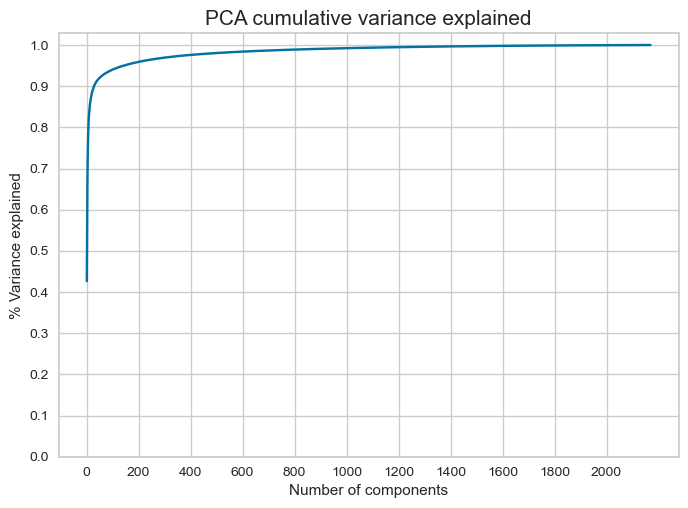

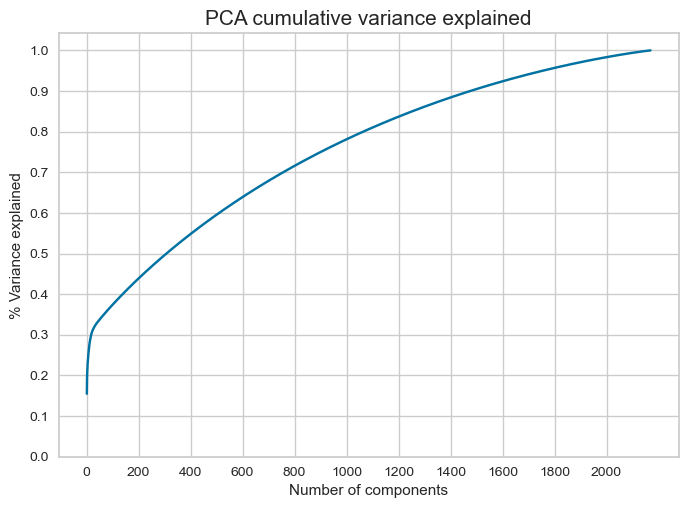

Required #PCs to explained 0.85 of the variance in X: 12
Required #PCs to explained 0.85 of the variance in transformed X: 1253
(2169, 45768)


In [7]:
# We now get the percentage of variance explained by the first principal component for the fitted X and fitted X transformed
print('%variance explained by PC1 for X:', round(pca_x.explained_variance_ratio_[0], 5))
print('%variance explained by PC1 for transformed X:', round(pca_xl.explained_variance_ratio_[0], 5))

# We plot the cumulative variance explained to get an idea of how the explained variance grows as more PCs are included
plot_cumulative_variance_explained(pca_x)
plot_cumulative_variance_explained(pca_xl)

# How many PC should we include to explain a given threshold of variance?
threshold = 0.85
nb_PC_X = np.where(np.cumsum(pca_x.explained_variance_ratio_) >= threshold)[0][0]+1
nb_PC_Xl = np.where(np.cumsum(pca_xl.explained_variance_ratio_) >= threshold)[0][0]+1
print('Required #PCs to explained {} of the variance in X: {}'.format(threshold, nb_PC_X))
print('Required #PCs to explained {} of the variance in transformed X: {}'.format(threshold, nb_PC_Xl))
print(X.shape)

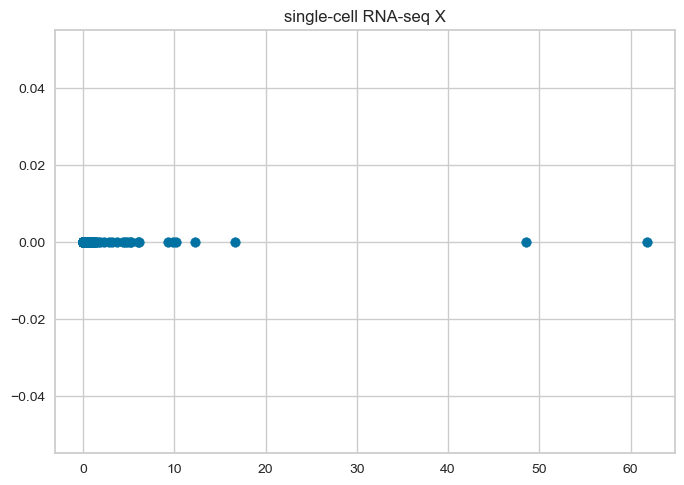

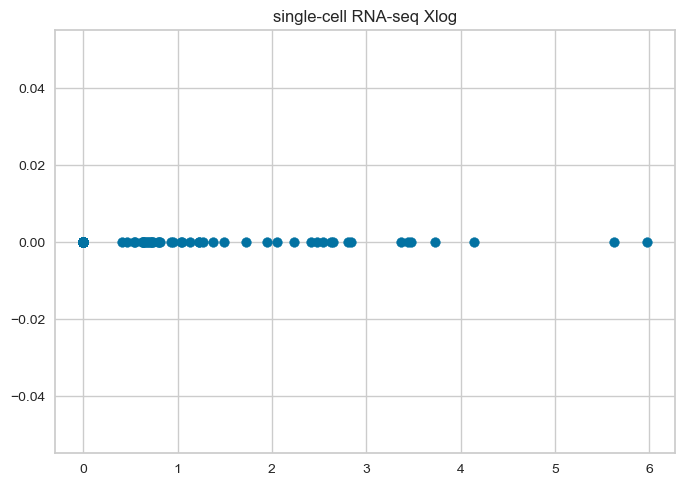

In [8]:
# We'll now visualize the transformed data. First the raw log-transformed data, then the log-transformed data transformed by PCA
plt.scatter(X[:,0], X[:,1])
plt.title('single-cell RNA-seq X')
plt.show()

plt.scatter(Xl[:,0], Xl[:,1])
plt.title('single-cell RNA-seq Xlog')
plt.show()

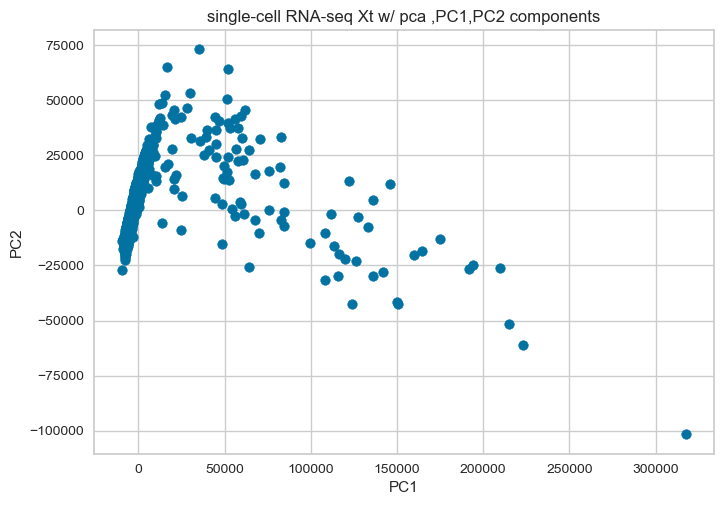

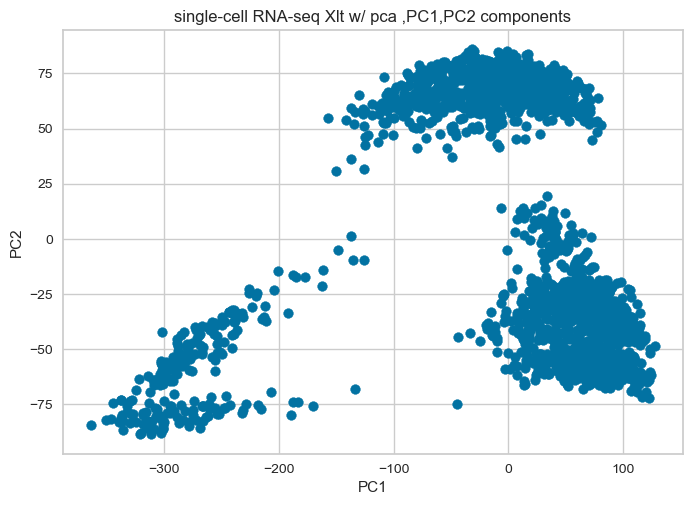

In [9]:
# PCA transformed pca_X_tranformed_pca
# *** BEST ***
plt.scatter(Xt[:,0], Xt[:,1])
plt.title('single-cell RNA-seq Xt w/ pca ,PC1,PC2 components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

plt.scatter(Xlt[:,0], Xlt[:,1])
plt.title('single-cell RNA-seq Xlt w/ pca ,PC1,PC2 components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

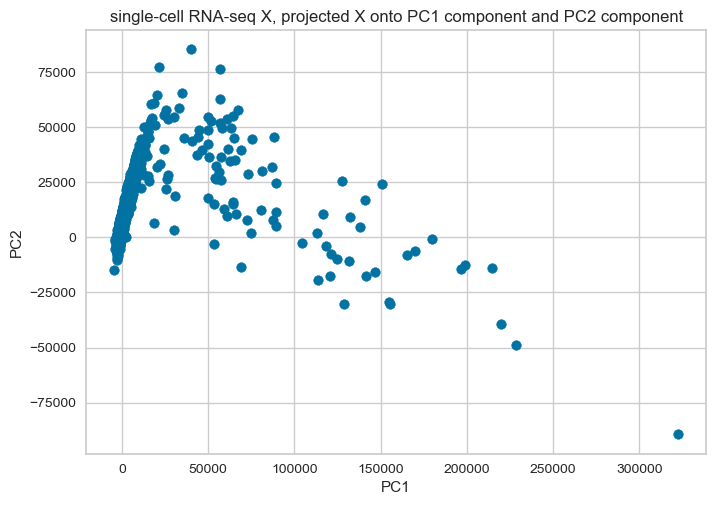

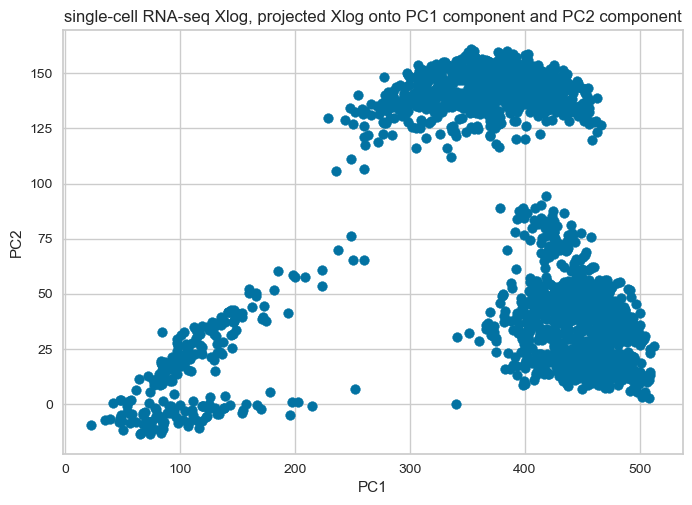

In [10]:
# PCA GRAPH
# Plot the data projected onto PC1 and
projectedX_onto_PC1 = np.matmul(X, pca_x.components_[0])
projectedX_onto_PC2 = np.matmul(X, pca_x.components_[1])
projectedXl_onto_PC1 = np.matmul(Xl, pca_xl.components_[0])
projectedXl_onto_PC2 = np.matmul(Xl, pca_xl.components_[1])
plt.scatter(projectedX_onto_PC1, projectedX_onto_PC2)
plt.title('single-cell RNA-seq X, projected X onto PC1 component and PC2 component')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

plt.scatter(projectedXl_onto_PC1, projectedXl_onto_PC2)
plt.title('single-cell RNA-seq Xlog, projected Xlog onto PC1 component and PC2 component')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

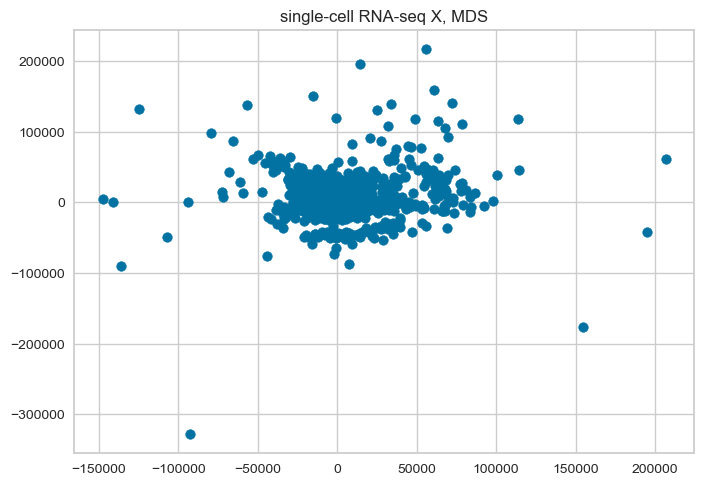

In [11]:
# MSD
# We will now visualize the data set in two dimension by reducing it using MDS (Multidimensional Scaling)
mds_X = MDS(verbose=1, eps=1e-5).fit_transform(X)
plt.scatter(mds_X[:,0], mds_X[:,1])
plt.title('single-cell RNA-seq X, MDS')
plt.show()

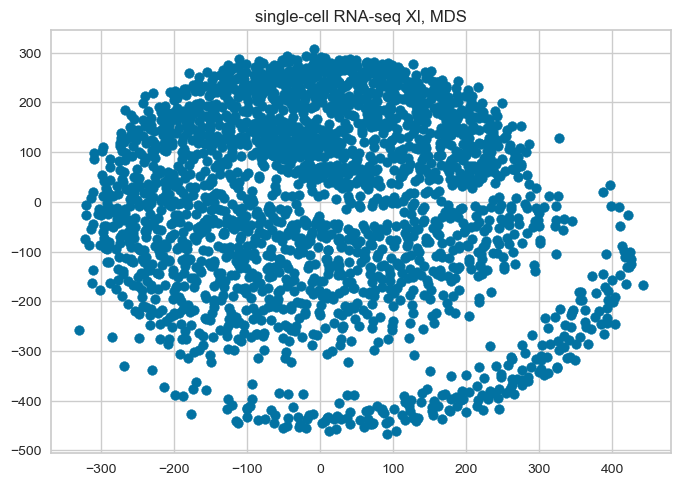

In [12]:
# MSD
# Xl
mds_Xl = MDS(verbose=1, eps=1e-5).fit_transform(Xl)
plt.scatter(mds_Xl[:,0], mds_Xl[:,1])
plt.title('single-cell RNA-seq Xl, MDS')
plt.show()

C:\Users\gangles\.conda\envs\py310\lib\site-packages\sklearn\manifold\_mds.py:632: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


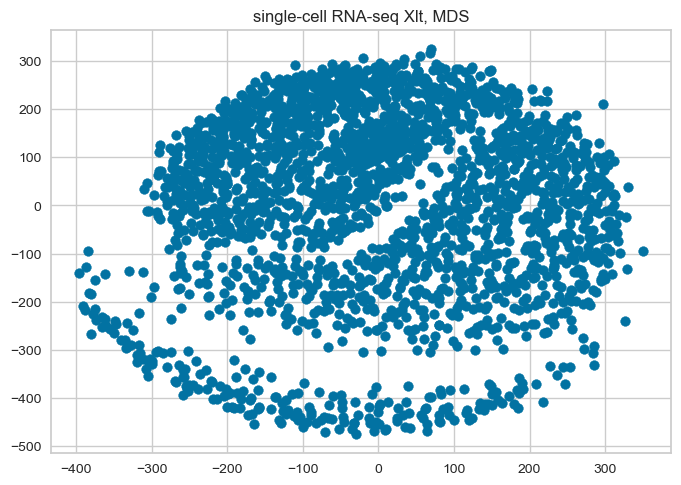

In [13]:
# MSD
# Xl
mds_Xlt = MDS(verbose=1, eps=1e-5).fit_transform(Xlt)
plt.scatter(mds_Xlt[:,0], mds_Xlt[:,1])
plt.title('single-cell RNA-seq Xlt, MDS')
plt.show()

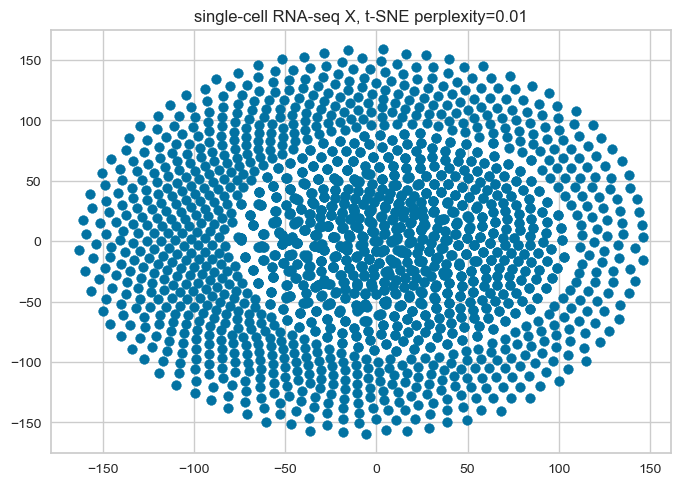

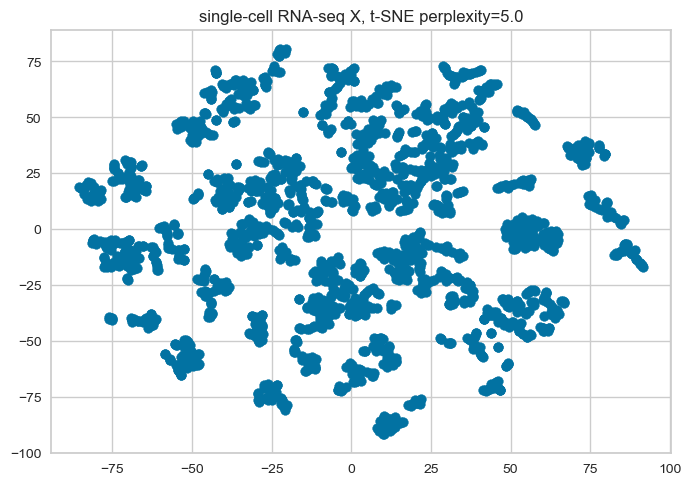

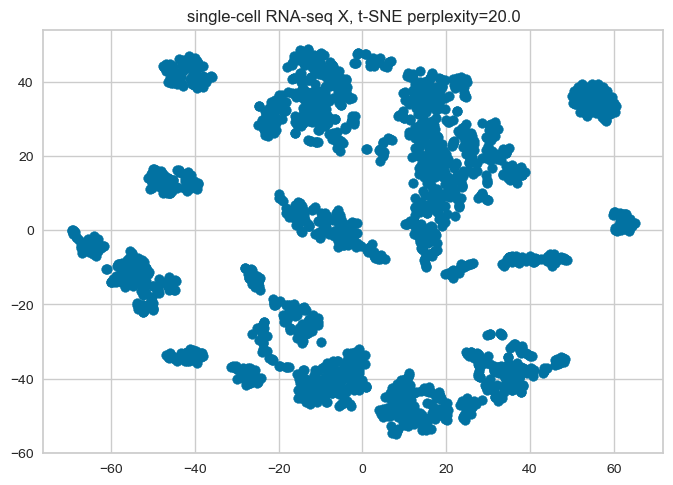

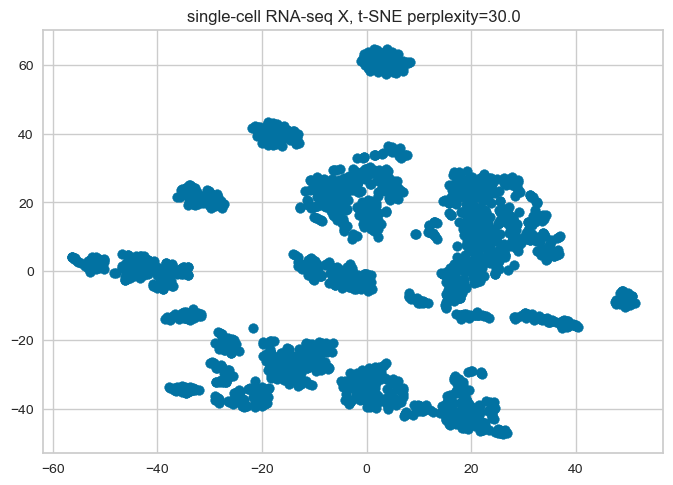

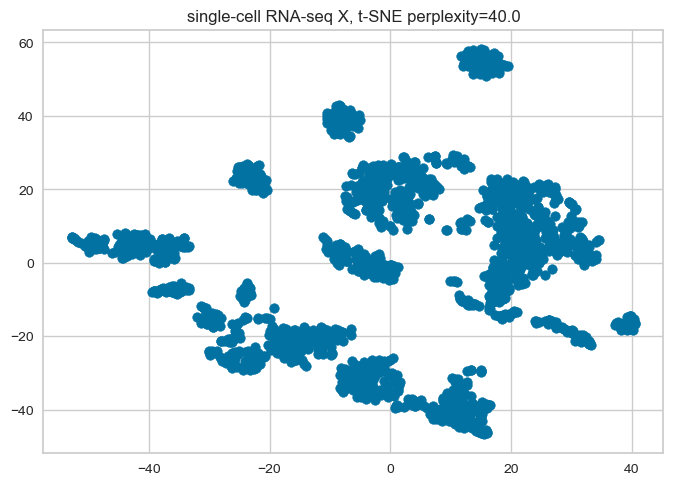

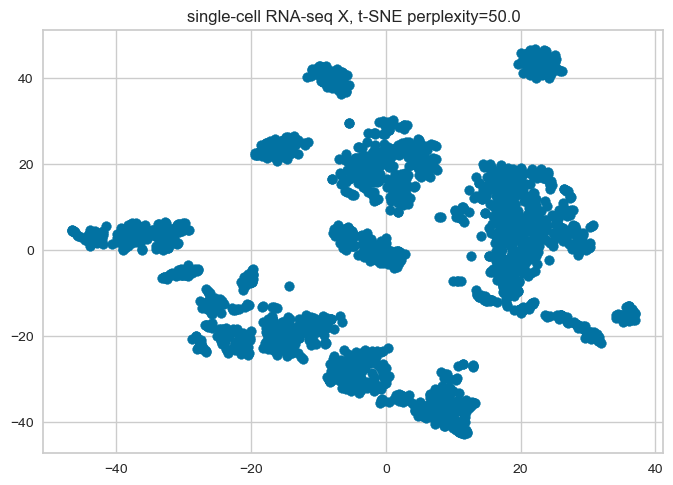

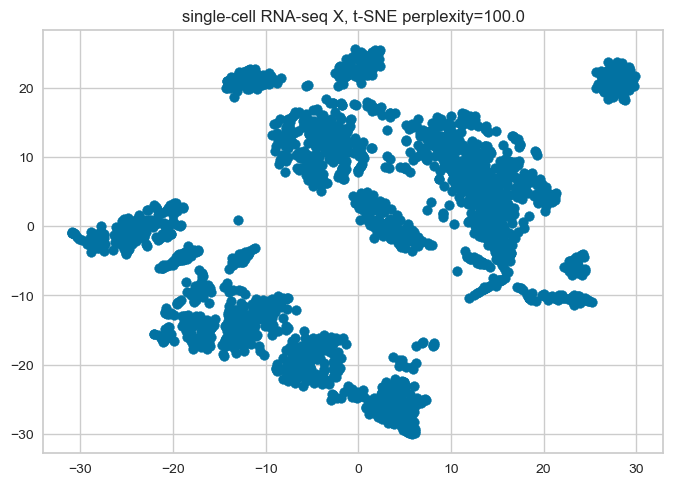

In [14]:
# Now visualize the dataset after reducing it using t-SNE (top 50 PC)
perplexities = [0.01,5.,20.,30.,40.,50.,100.]
for perplexity in perplexities:
    tsne_top_PC = TSNE(n_components=2, perplexity=perplexity).fit_transform(X)
    plt.scatter(tsne_top_PC[:,0], tsne_top_PC[:,1])
    plt.title('single-cell RNA-seq X, t-SNE perplexity={}'.format(perplexity))
    plt.show()

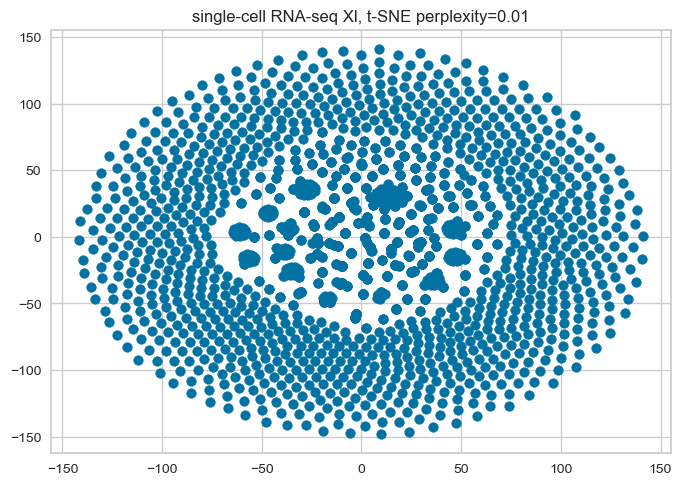

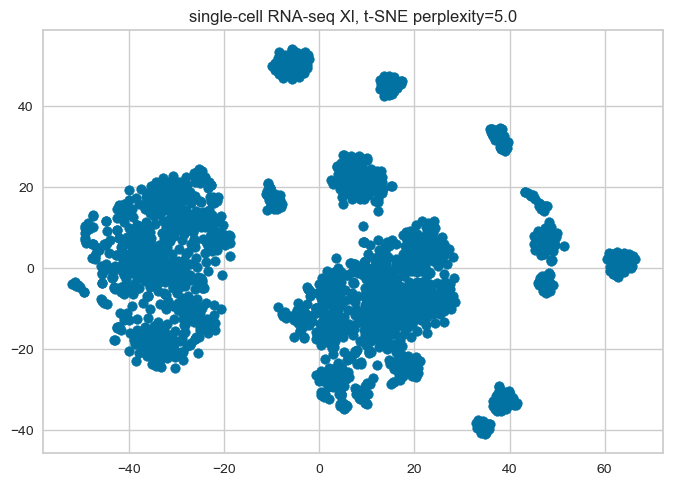

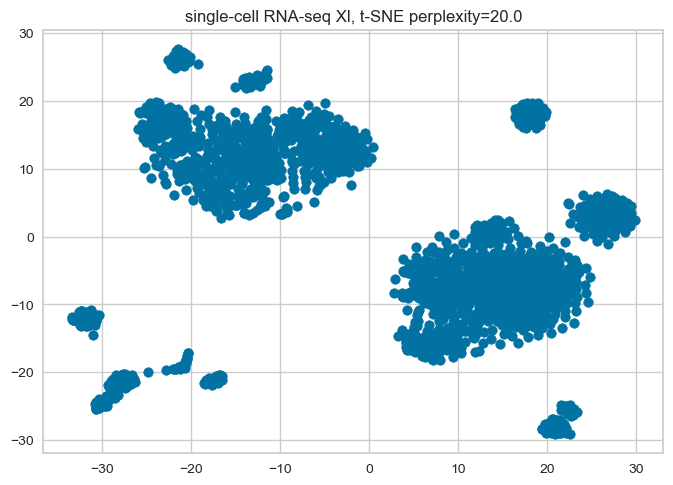

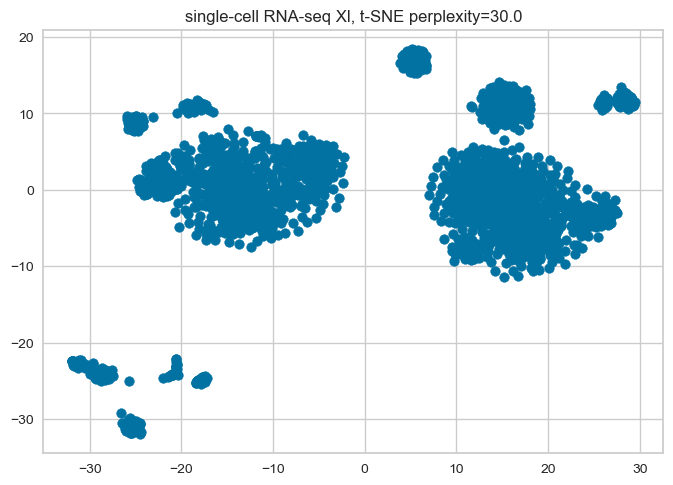

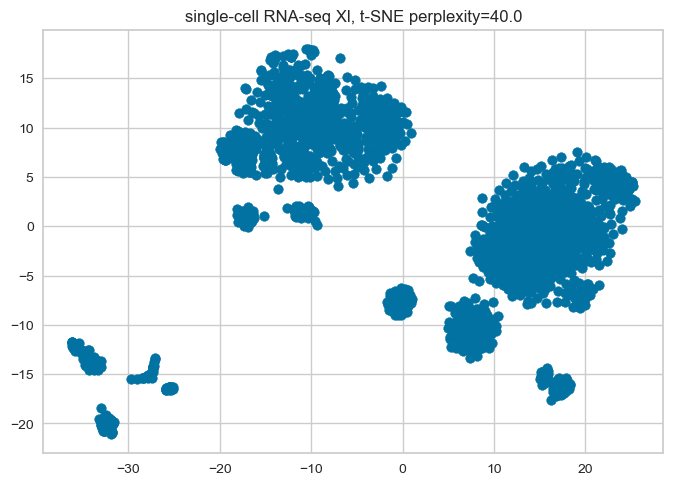

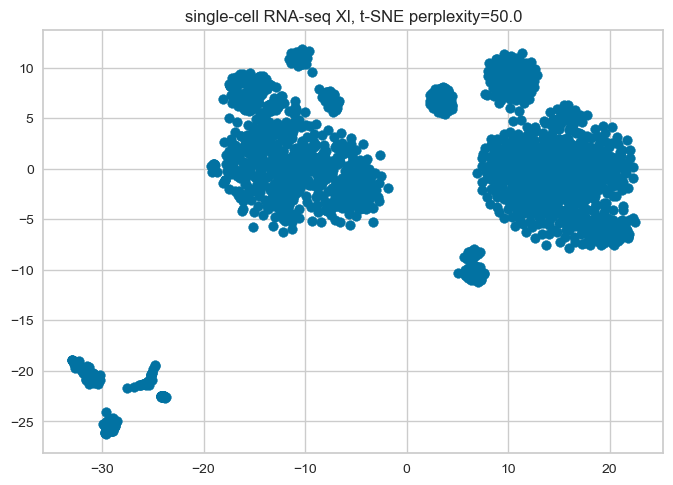

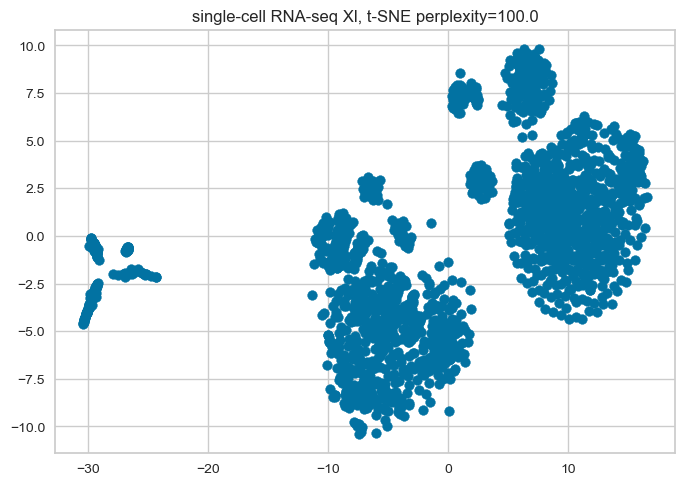

In [15]:
perplexities = [0.01,5.,20.,30.,40.,50.,100.]
for perplexity in perplexities:
    tsne_top_PC = TSNE(n_components=2, perplexity=perplexity).fit_transform(Xl)
    plt.scatter(tsne_top_PC[:,0], tsne_top_PC[:,1])
    plt.title('single-cell RNA-seq Xl, t-SNE perplexity={}'.format(perplexity))
    plt.show()

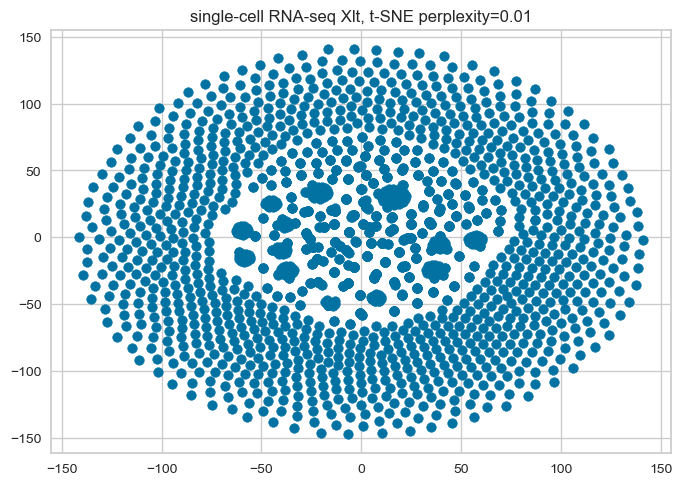

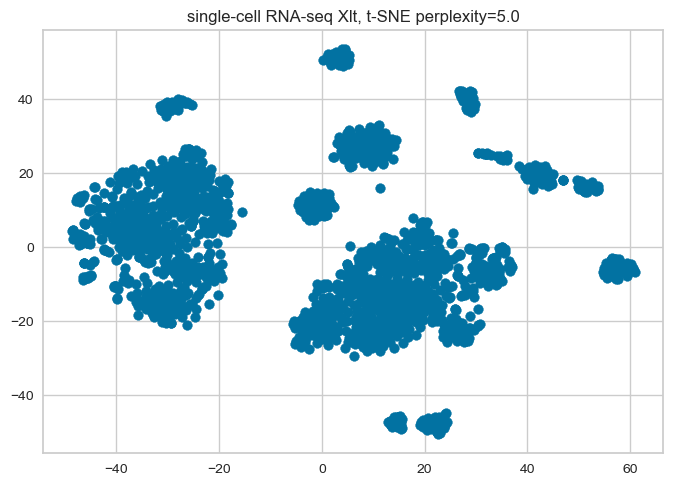

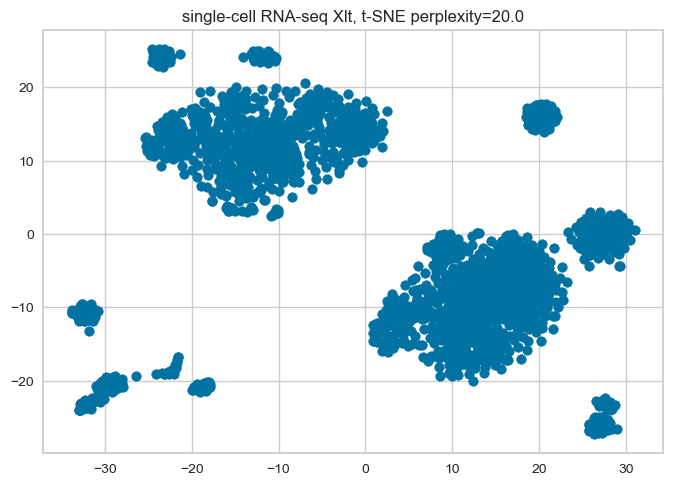

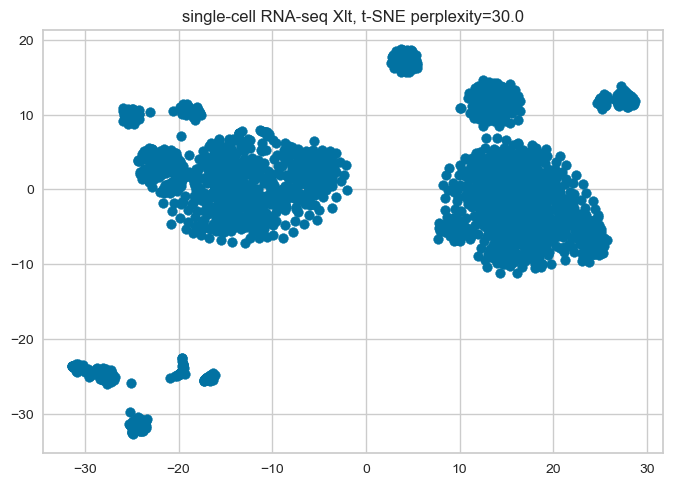

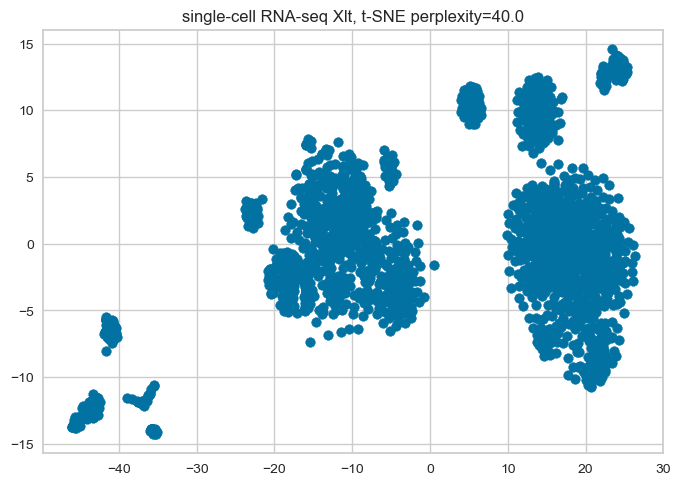

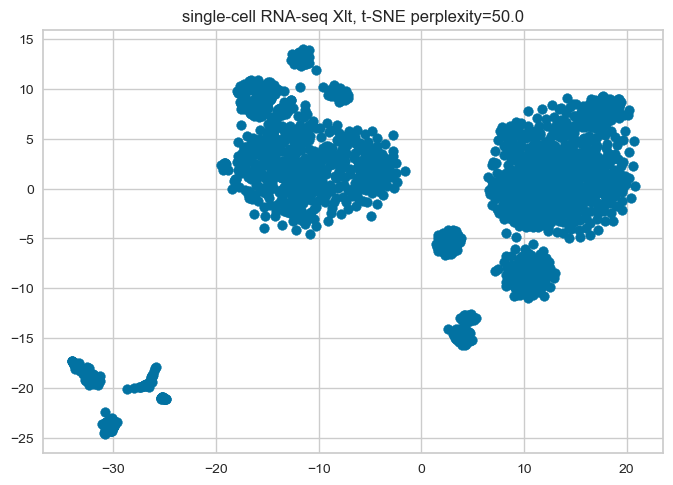

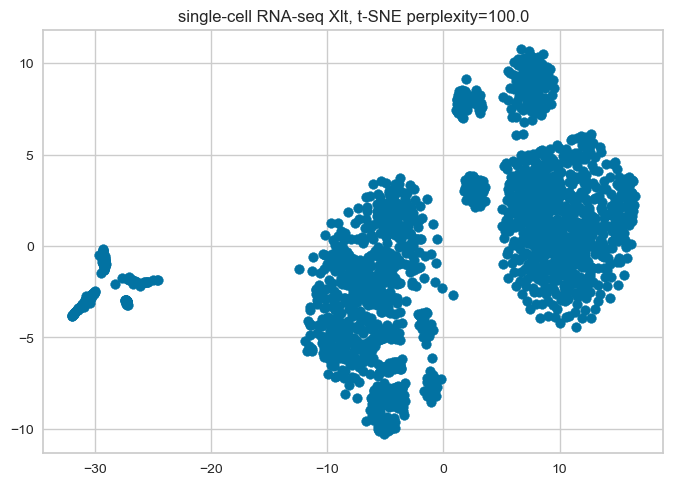

In [16]:
perplexities = [0.01,5.,20.,30.,40.,50.,100.]
for perplexity in perplexities:
    tsne_top_PC = TSNE(n_components=2, perplexity=perplexity).fit_transform(Xlt)
    plt.scatter(tsne_top_PC[:,0], tsne_top_PC[:,1])
    plt.title('single-cell RNA-seq Xlt, t-SNE perplexity={}'.format(perplexity))
    plt.show()

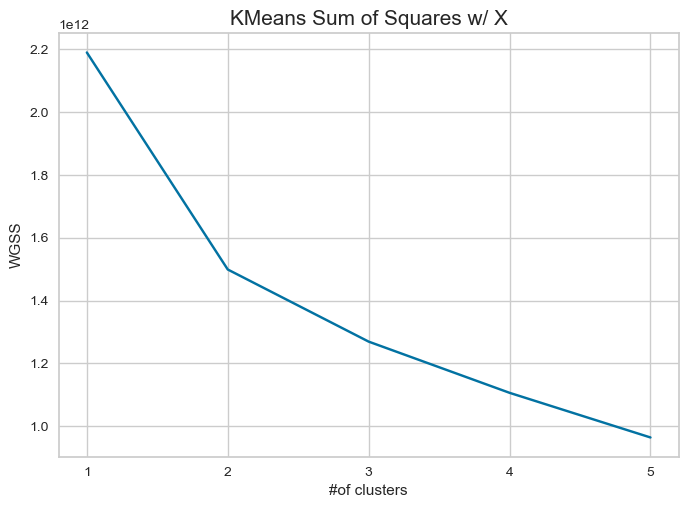

In [17]:
# elbow plot
plt.plot(range(1, 6), [KMeans(i, n_init=50).fit(X).inertia_ for i in range(1, 6)])
plt.xticks(range(1, 6))
plt.xlabel('#of clusters')
plt.ylabel('WGSS')
plt.title('KMeans Sum of Squares w/ X', size=15)
#plt.savefig('./plots/analysis2/brainCells_log-transformed_ElbowPlot')
plt.show()

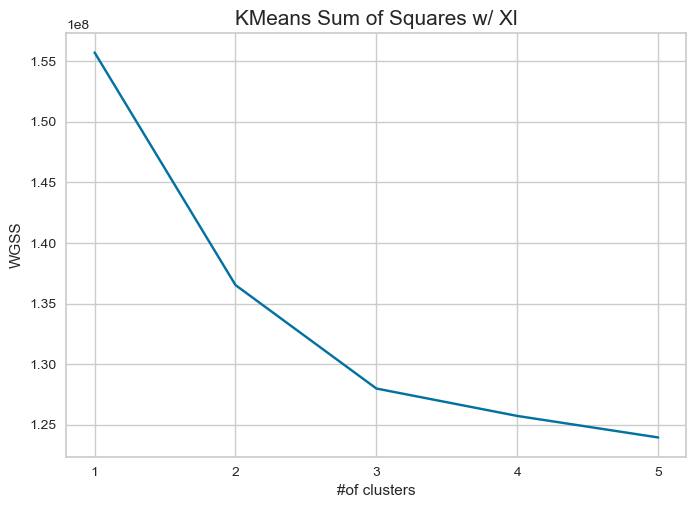

In [18]:
plt.plot(range(1, 6), [KMeans(i, n_init=50).fit(Xl).inertia_ for i in range(1, 6)])
plt.xticks(range(1, 6))
plt.xlabel('#of clusters')
plt.ylabel('WGSS')
plt.title('KMeans Sum of Squares w/ Xl', size=15)
#plt.savefig('./plots/analysis2/brainCells_log-transformed_ElbowPlot')
plt.show()

In [19]:
start_time = time.perf_counter()
n_clusters = 3
clustering3X = KMeans(n_clusters=n_clusters, n_init=50)
elapsed_time = time.perf_counter() - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")
X3 = clustering3X.fit(X)
elapsed_time = time.perf_counter() - elapsed_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")
colors3X = np.array(resolve_colors(n_clusters, 'yellowbrick'))

Elapsed time: 0.0001 seconds
Elapsed time: 4885.8677 seconds


In [20]:
start_time = time.perf_counter()
n_clusters = 35
clustering5X = KMeans(n_clusters=n_clusters, n_init=50)
elapsed_time = time.perf_counter() - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")
X5 = clustering5X.fit(X)
colors5X = np.array(resolve_colors(n_clusters, 'yellowbrick'))
elapsed_time = time.perf_counter() - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")

Elapsed time: 0.0002 seconds
Elapsed time: 494.3473 seconds


In [21]:
# As both the elbow and silhouette plots agree on 3 being a right number of clusters,
# we will perform KMeans with  3 clusters.
start_time = time.perf_counter()
n_clusters = 3
clustering3Xt = KMeans(n_clusters=n_clusters, n_init=50)
Xt3 = clustering3Xt.fit(Xt)
colors3Xt = np.array(resolve_colors(n_clusters, 'yellowbrick'))
elapsed_time = time.perf_counter() - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")

start_time = time.perf_counter()
n_clusters = 35
clustering5Xt = KMeans(n_clusters=n_clusters, n_init=50)
Xt5 = clustering5Xt.fit(Xt)
colors5Xt = np.array(resolve_colors(n_clusters, 'yellowbrick'))
elapsed_time = time.perf_counter() - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")

start_time = time.perf_counter()
n_clusters = 3
clustering3Xl = KMeans(n_clusters=n_clusters, n_init=50)
Xl3 = clustering3Xl.fit(Xl)
colors3Xl = np.array(resolve_colors(n_clusters, 'yellowbrick'))
elapsed_time = time.perf_counter() - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")

start_time = time.perf_counter()
n_clusters = 35
clustering5Xl = KMeans(n_clusters=n_clusters, n_init=50)
Xl5 = clustering5Xl.fit(Xl)
colors5Xl = np.array(resolve_colors(n_clusters, 'yellowbrick'))
elapsed_time = time.perf_counter() - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")

start_time = time.perf_counter()
n_clusters = 3
clustering3Xlt = KMeans(n_clusters=n_clusters, n_init=50)
Xlt3 = clustering3Xlt.fit(Xlt)
colors3Xlt = np.array(resolve_colors(n_clusters, 'yellowbrick'))
elapsed_time = time.perf_counter() - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")

start_time = time.perf_counter()
n_clusters = 35
clustering5Xlt = KMeans(n_clusters=n_clusters, n_init=50)
Xlt5 = clustering5Xlt.fit(Xlt)
colors5Xlt = np.array(resolve_colors(n_clusters, 'yellowbrick'))
elapsed_time = time.perf_counter() - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")

Elapsed time: 4.8540 seconds
Elapsed time: 20.5597 seconds
Elapsed time: 70.2676 seconds
Elapsed time: 454.1206 seconds
Elapsed time: 2.9785 seconds
Elapsed time: 18.1228 seconds


In [22]:
print(colors3X)
print(colors5X)
print(colors3Xlt)
print(colors5Xlt)
print(clustering3X.labels_)
print(clustering5X.labels_)
print(clustering3Xl.labels_)
print(clustering5Xl.labels_)
print(clustering3Xlt.labels_)
print(clustering5Xlt.labels_)

[[0.00784 0.44706 0.63529]
 [0.62353 0.76471 0.46667]
 [0.79216 0.04314 0.01176]]
[[0.00784 0.44706 0.63529]
 [0.62353 0.76471 0.46667]
 [0.79216 0.04314 0.01176]
 [0.64706 0.00784 0.3451 ]
 [0.84314 0.78039 0.01176]
 [0.53333 0.79216 0.8549 ]
 [0.00784 0.44706 0.63529]
 [0.62353 0.76471 0.46667]
 [0.79216 0.04314 0.01176]
 [0.64706 0.00784 0.3451 ]
 [0.84314 0.78039 0.01176]
 [0.53333 0.79216 0.8549 ]
 [0.00784 0.44706 0.63529]
 [0.62353 0.76471 0.46667]
 [0.79216 0.04314 0.01176]
 [0.64706 0.00784 0.3451 ]
 [0.84314 0.78039 0.01176]
 [0.53333 0.79216 0.8549 ]
 [0.00784 0.44706 0.63529]
 [0.62353 0.76471 0.46667]
 [0.79216 0.04314 0.01176]
 [0.64706 0.00784 0.3451 ]
 [0.84314 0.78039 0.01176]
 [0.53333 0.79216 0.8549 ]
 [0.00784 0.44706 0.63529]
 [0.62353 0.76471 0.46667]
 [0.79216 0.04314 0.01176]
 [0.64706 0.00784 0.3451 ]
 [0.84314 0.78039 0.01176]
 [0.53333 0.79216 0.8549 ]
 [0.00784 0.44706 0.63529]
 [0.62353 0.76471 0.46667]
 [0.79216 0.04314 0.01176]
 [0.64706 0.00784 0.3451 ]


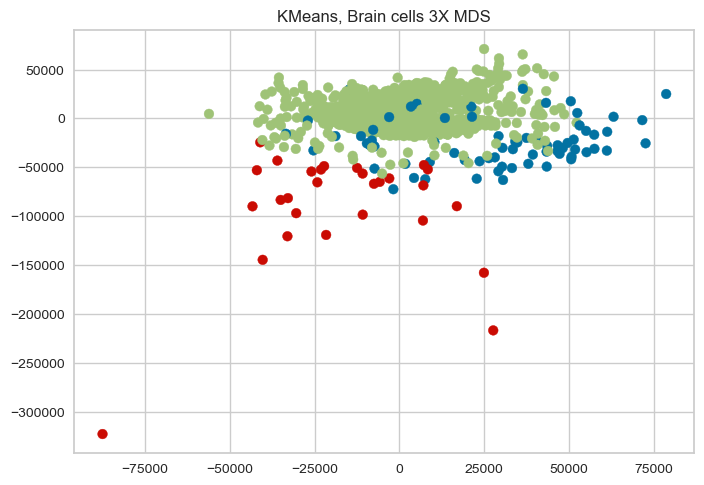

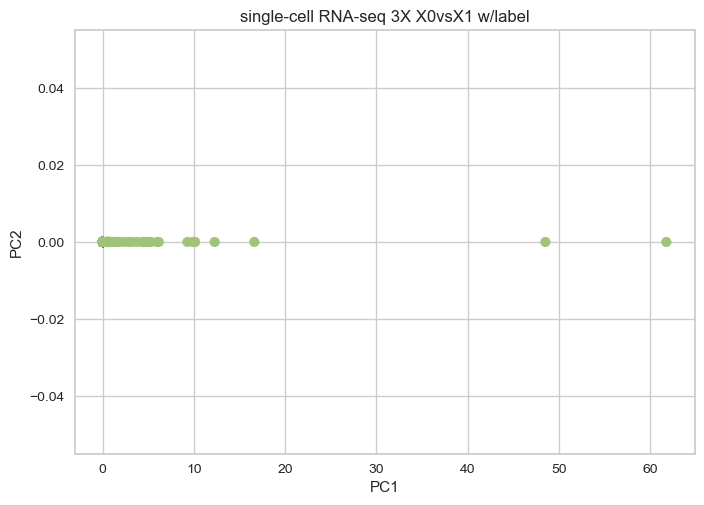

Elapsed time: 198.8668 seconds


In [23]:
start_time = time.perf_counter()
mds_brain_cells3X = MDS(n_components=3, eps=1e-7).fit_transform(X)
plt.scatter(mds_brain_cells3X[:,0], mds_brain_cells3X[:,1], c=colors3X[clustering3X.labels_])
plt.title('KMeans, Brain cells 3X MDS')
plt.show()

plt.scatter(X[:,0], X[:,1], c=colors3X[clustering3X.labels_])
plt.title('single-cell RNA-seq 3X X0vsX1 w/label')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
elapsed_time = time.perf_counter() - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")

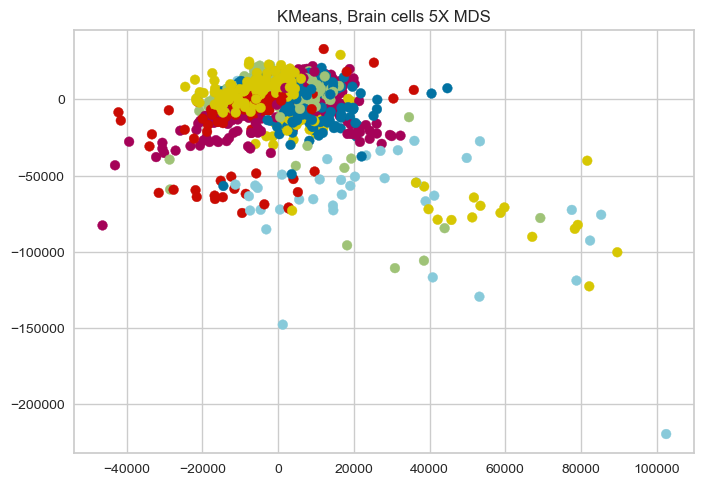

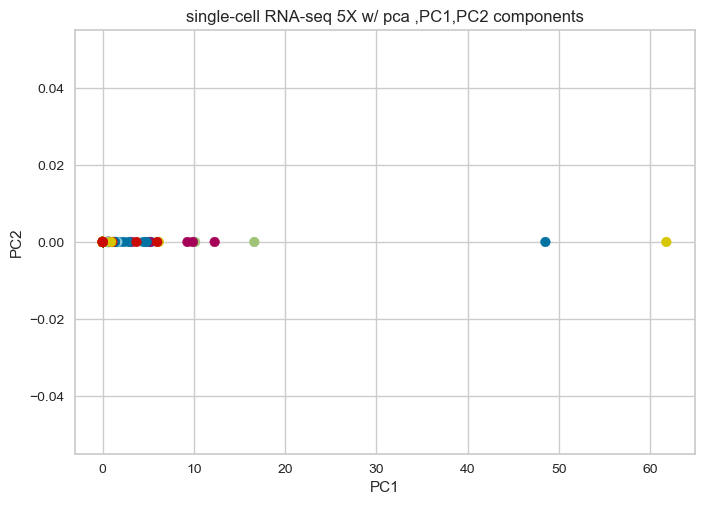

Elapsed time: 198.2859 seconds


In [24]:
start_time = time.perf_counter()
mds_brain_cells5X = MDS(n_components=5, eps=1e-7).fit_transform(X)
plt.scatter(mds_brain_cells5X[:,0], mds_brain_cells5X[:,1], c=colors5X[clustering5X.labels_])
plt.title('KMeans, Brain cells 5X MDS')
plt.show()

plt.scatter(X[:,0], X[:,1], c=colors5X[clustering5X.labels_])
plt.title('single-cell RNA-seq 5X w/ pca ,PC1,PC2 components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
elapsed_time = time.perf_counter() - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")

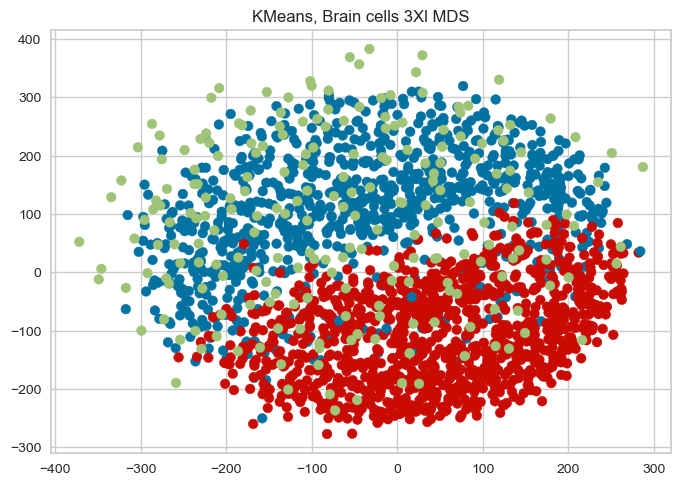

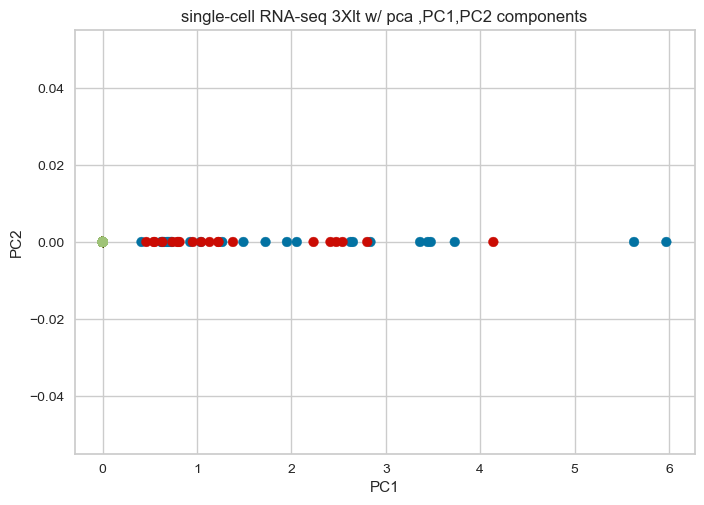

In [25]:
mds_brain_cells3Xl = MDS(n_components=3, eps=1e-7).fit_transform(Xl)
plt.scatter(mds_brain_cells3Xl[:,0], mds_brain_cells3Xl[:,1], c=colors3Xl[clustering3Xl.labels_])
plt.title('KMeans, Brain cells 3Xl MDS')
plt.show()

plt.scatter(Xl[:,0], Xl[:,1], c=colors3Xl[clustering3Xl.labels_])
plt.title('single-cell RNA-seq 3Xlt w/ pca ,PC1,PC2 components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

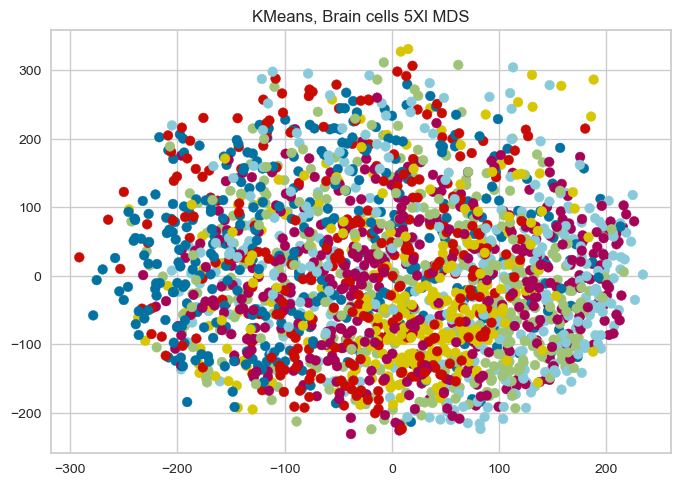

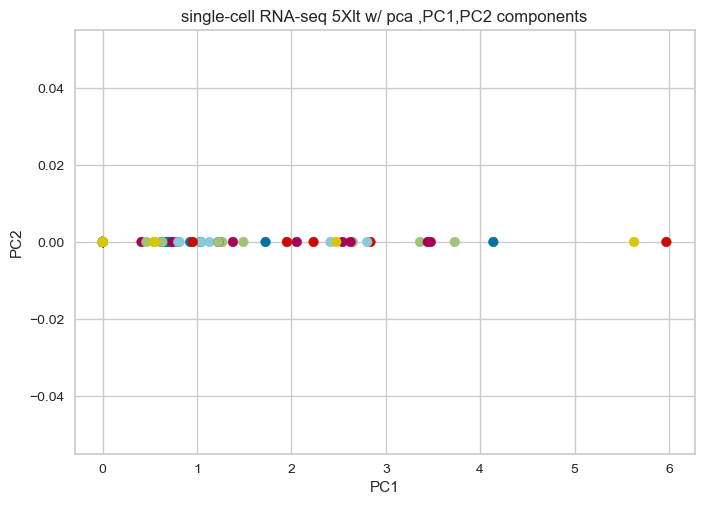

In [26]:
mds_brain_cells5Xl = MDS(n_components=5, eps=1e-7).fit_transform(Xl)
plt.scatter(mds_brain_cells5Xl[:,0], mds_brain_cells5Xl[:,1], c=colors5Xl[clustering5Xl.labels_])
plt.title('KMeans, Brain cells 5Xl MDS')
plt.show()

plt.scatter(Xl[:,0], Xl[:,1], c=colors5Xl[clustering5Xl.labels_])
plt.title('single-cell RNA-seq 5Xlt w/ pca ,PC1,PC2 components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

C:\Users\gangles\.conda\envs\py310\lib\site-packages\sklearn\manifold\_mds.py:632: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


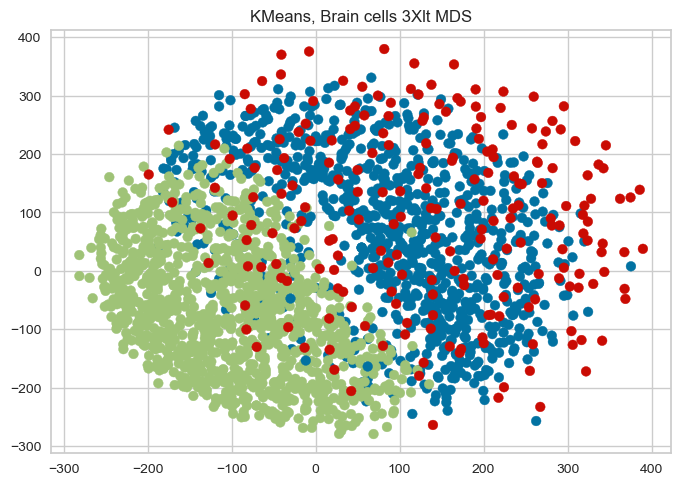

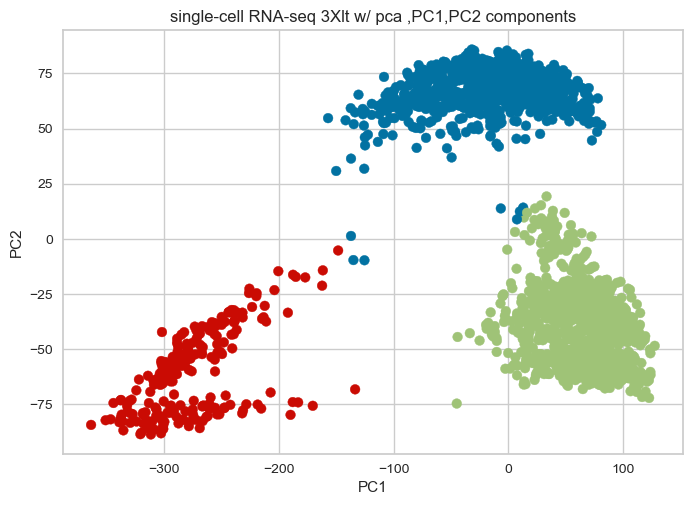

In [27]:
mds_brain_cells3Xlt = MDS(n_components=3, eps=1e-7).fit_transform(Xlt)
plt.scatter(mds_brain_cells3Xlt[:,0], mds_brain_cells3Xlt[:,1], c=colors3Xlt[clustering3Xlt.labels_])
plt.title('KMeans, Brain cells 3Xlt MDS')
plt.show()

plt.scatter(Xlt[:,0], Xlt[:,1], c=colors3Xlt[clustering3Xlt.labels_])
plt.title('single-cell RNA-seq 3Xlt w/ pca ,PC1,PC2 components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

C:\Users\gangles\.conda\envs\py310\lib\site-packages\sklearn\manifold\_mds.py:632: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


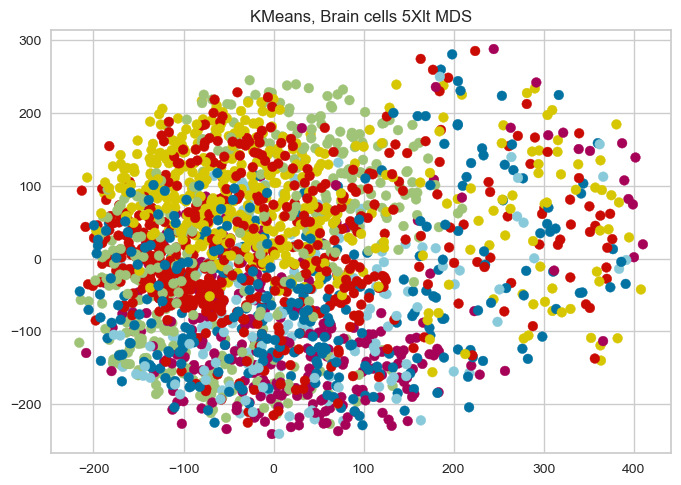

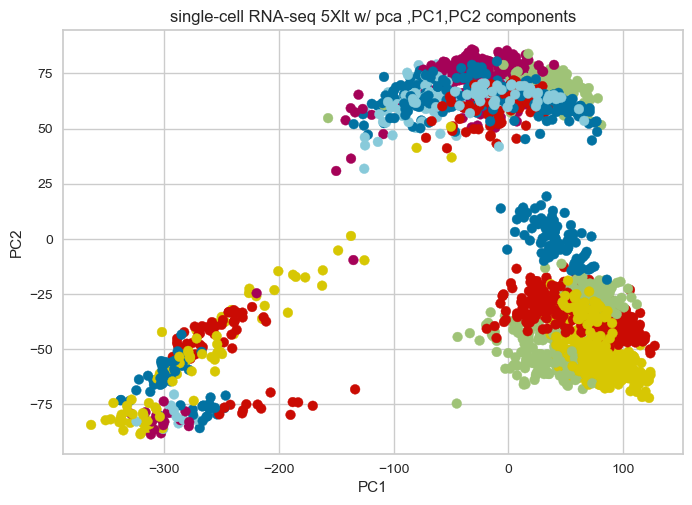

In [28]:
mds_brain_cells5Xlt = MDS(n_components=5, eps=1e-7).fit_transform(Xlt)
plt.scatter(mds_brain_cells5Xlt[:,0], mds_brain_cells5Xlt[:,1], c=colors5Xlt[clustering5Xlt.labels_])
plt.title('KMeans, Brain cells 5Xlt MDS')
plt.show()

plt.scatter(Xlt[:,0], Xlt[:,1], c=colors5Xlt[clustering5Xlt.labels_])
plt.title('single-cell RNA-seq 5Xlt w/ pca ,PC1,PC2 components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

C:\Users\gangles\AppData\Local\Temp\ipykernel_14276\1197076579.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1],c=colors5X[clustering5X.labels_], cmap='viridis')


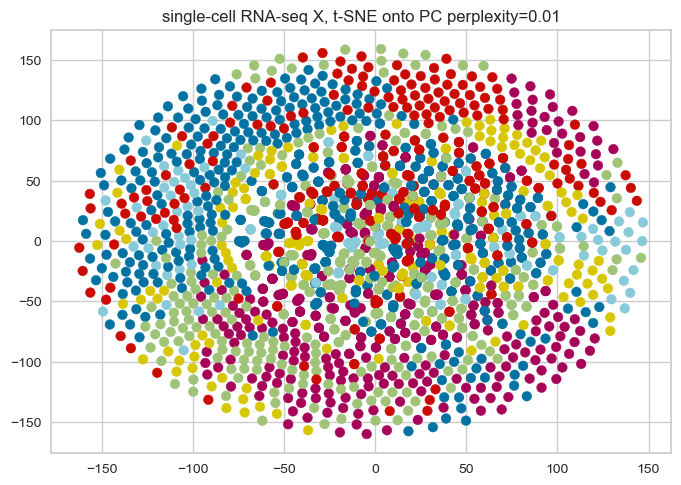

C:\Users\gangles\AppData\Local\Temp\ipykernel_14276\1197076579.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1],c=colors5X[clustering5X.labels_], cmap='viridis')


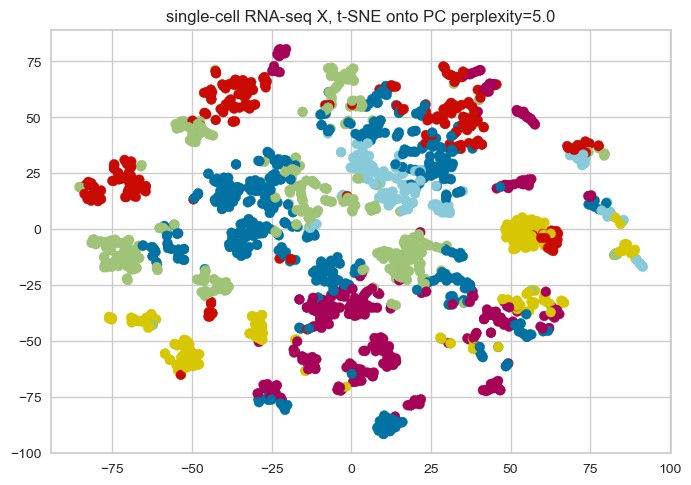

C:\Users\gangles\AppData\Local\Temp\ipykernel_14276\1197076579.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1],c=colors5X[clustering5X.labels_], cmap='viridis')


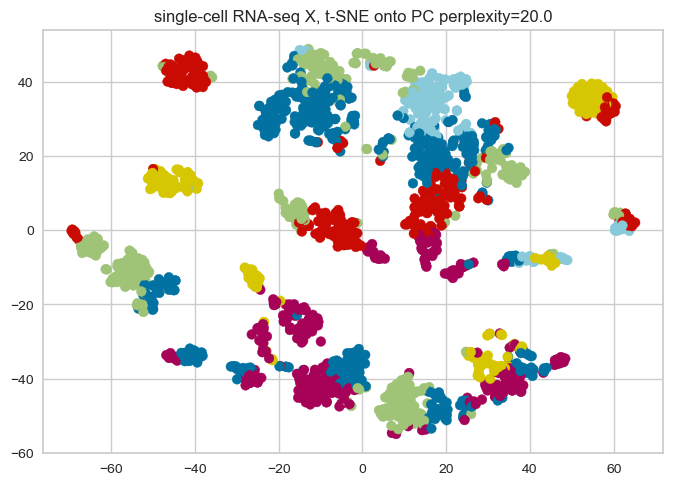

C:\Users\gangles\AppData\Local\Temp\ipykernel_14276\1197076579.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1],c=colors5X[clustering5X.labels_], cmap='viridis')


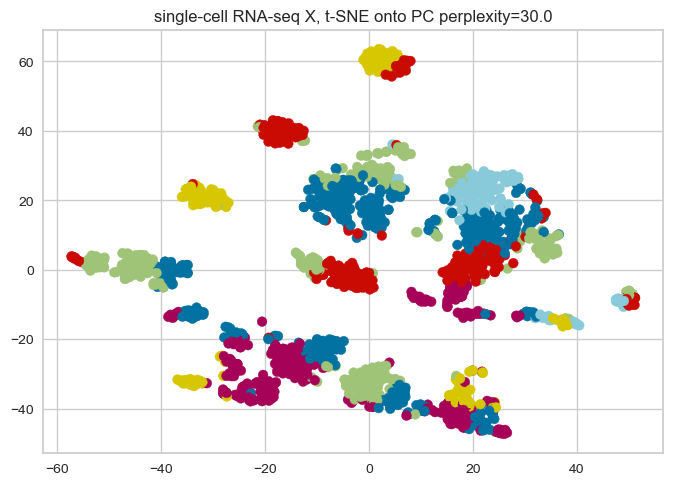

C:\Users\gangles\AppData\Local\Temp\ipykernel_14276\1197076579.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1],c=colors5X[clustering5X.labels_], cmap='viridis')


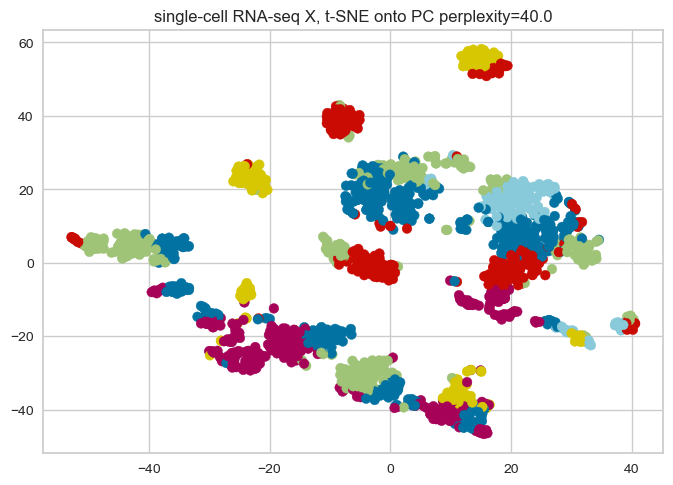

C:\Users\gangles\AppData\Local\Temp\ipykernel_14276\1197076579.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1],c=colors5X[clustering5X.labels_], cmap='viridis')


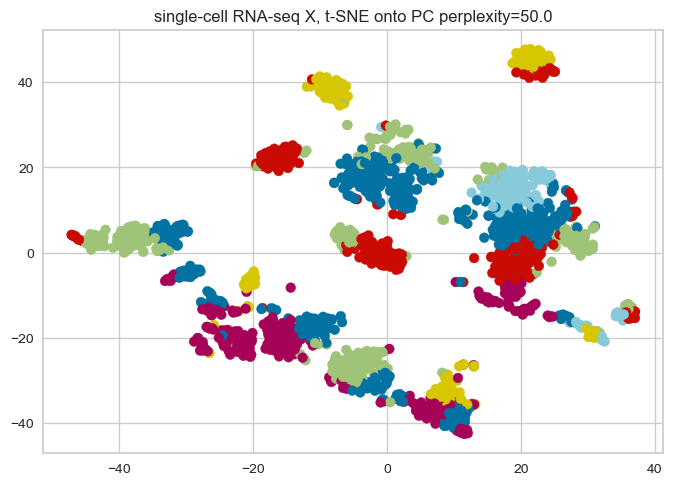

C:\Users\gangles\AppData\Local\Temp\ipykernel_14276\1197076579.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1],c=colors5X[clustering5X.labels_], cmap='viridis')


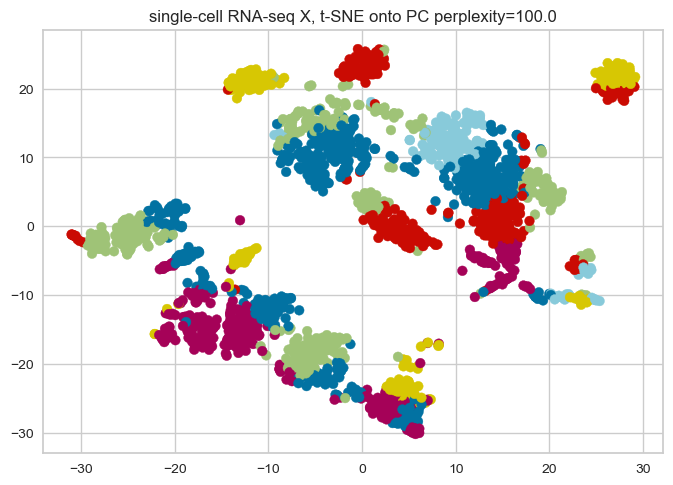

In [29]:
# Explore the effect of the perplexity parameter on t-SNE
perplexities = [0.01,5.,20.,30.,40.,50.,100.]
for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity).fit_transform(X)
    plt.scatter(tsne[:,0], tsne[:,1],c=colors5X[clustering5X.labels_], cmap='viridis')
    plt.title('single-cell RNA-seq X, t-SNE onto PC perplexity={}'.format(perplexity))
    plt.show()

C:\Users\gangles\AppData\Local\Temp\ipykernel_14276\3468961739.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1], c=colors5Xl[clustering5Xl.labels_], cmap='viridis')


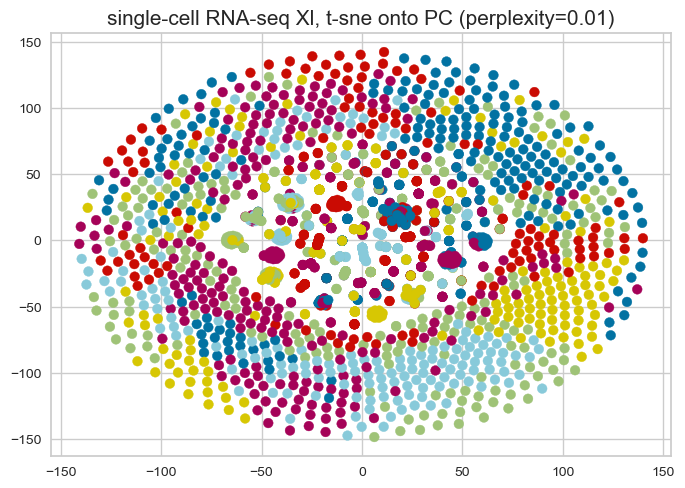

C:\Users\gangles\AppData\Local\Temp\ipykernel_14276\3468961739.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1], c=colors5Xl[clustering5Xl.labels_], cmap='viridis')


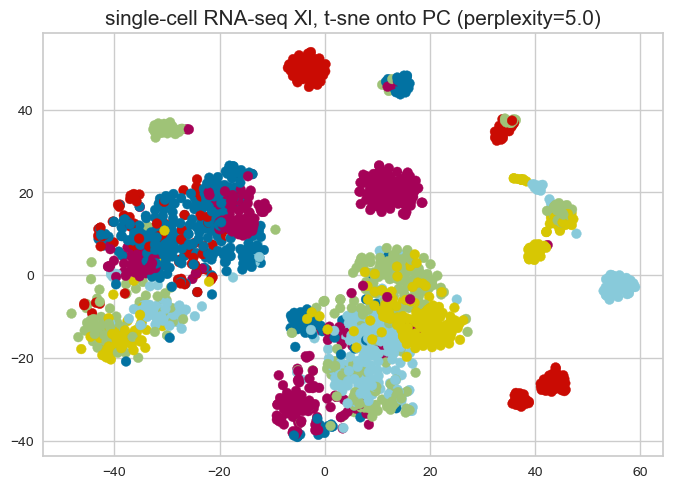

C:\Users\gangles\AppData\Local\Temp\ipykernel_14276\3468961739.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1], c=colors5Xl[clustering5Xl.labels_], cmap='viridis')


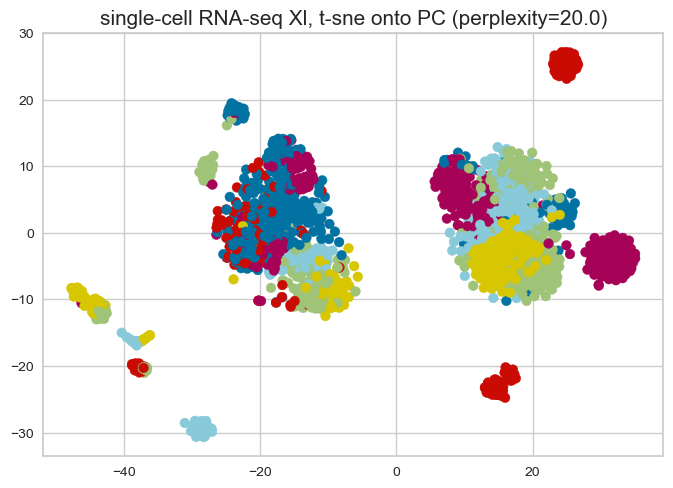

C:\Users\gangles\AppData\Local\Temp\ipykernel_14276\3468961739.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1], c=colors5Xl[clustering5Xl.labels_], cmap='viridis')


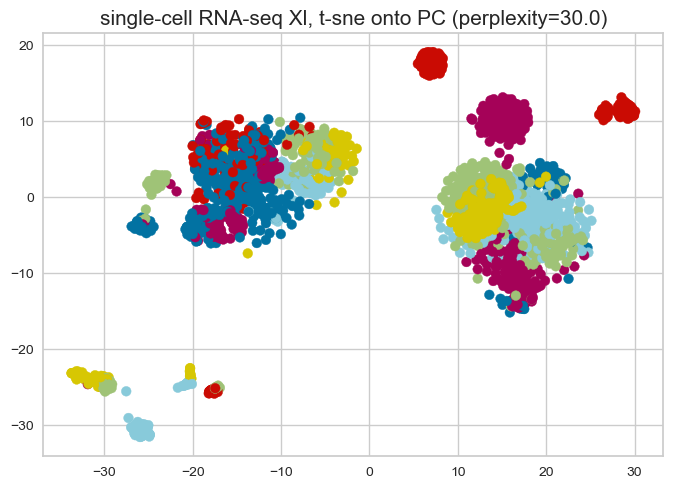

C:\Users\gangles\AppData\Local\Temp\ipykernel_14276\3468961739.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1], c=colors5Xl[clustering5Xl.labels_], cmap='viridis')


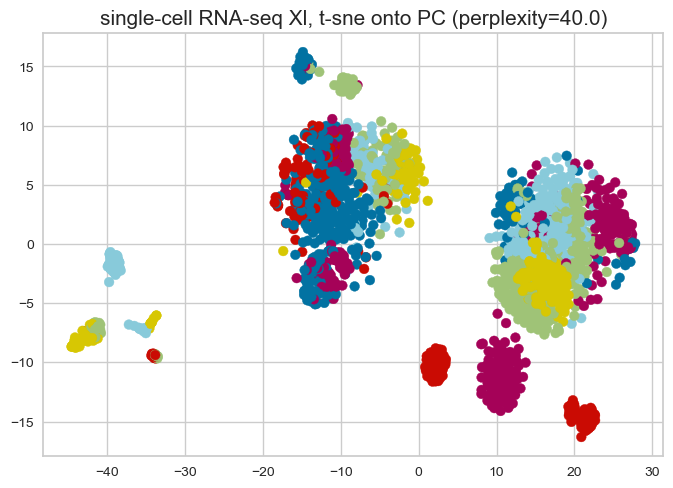

C:\Users\gangles\AppData\Local\Temp\ipykernel_14276\3468961739.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1], c=colors5Xl[clustering5Xl.labels_], cmap='viridis')


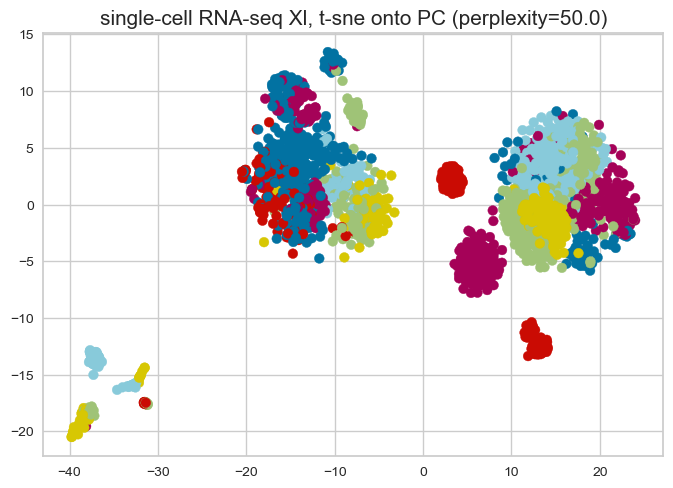

C:\Users\gangles\AppData\Local\Temp\ipykernel_14276\3468961739.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1], c=colors5Xl[clustering5Xl.labels_], cmap='viridis')


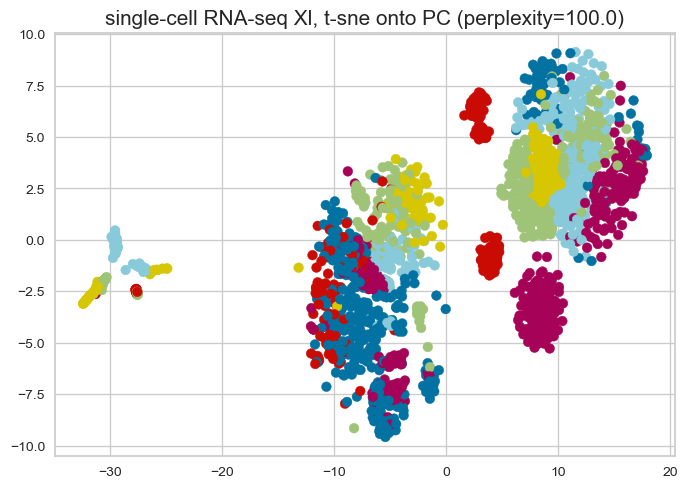

In [30]:
perplexities = np.array([0.01,5.,20.,30.,40.,50.,100.])
for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity).fit_transform(Xl)
    plt.scatter(tsne[:,0], tsne[:,1], c=colors5Xl[clustering5Xl.labels_], cmap='viridis')
    plt.title('single-cell RNA-seq Xl, t-sne onto PC (perplexity={})'.format(perplexity), size=15)
    plt.show()

C:\Users\gangles\AppData\Local\Temp\ipykernel_14276\1896627316.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1],c=colors5Xlt[clustering5Xlt.labels_], cmap='viridis')


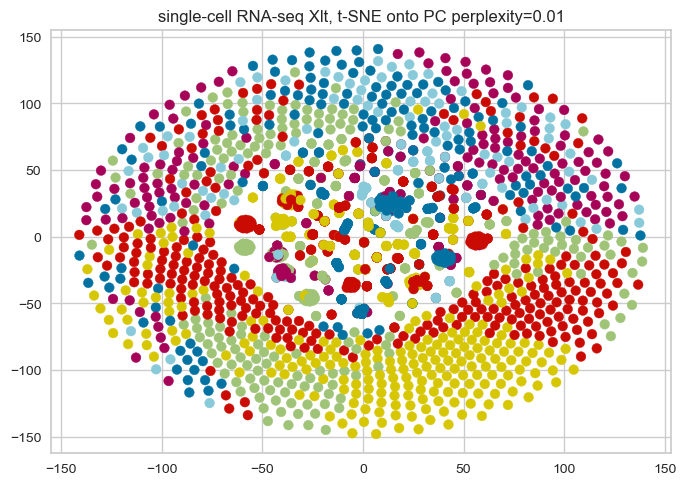

C:\Users\gangles\AppData\Local\Temp\ipykernel_14276\1896627316.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1],c=colors5Xlt[clustering5Xlt.labels_], cmap='viridis')


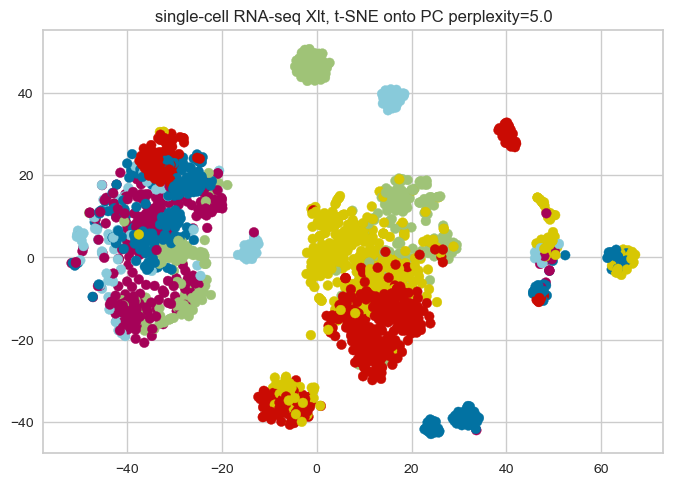

C:\Users\gangles\AppData\Local\Temp\ipykernel_14276\1896627316.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1],c=colors5Xlt[clustering5Xlt.labels_], cmap='viridis')


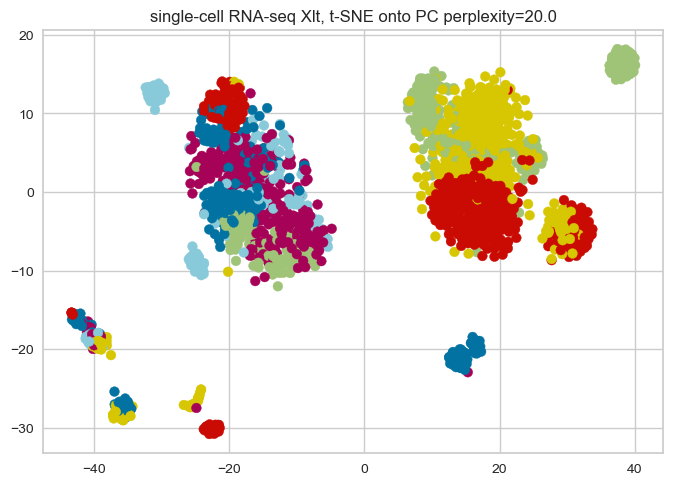

C:\Users\gangles\AppData\Local\Temp\ipykernel_14276\1896627316.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1],c=colors5Xlt[clustering5Xlt.labels_], cmap='viridis')


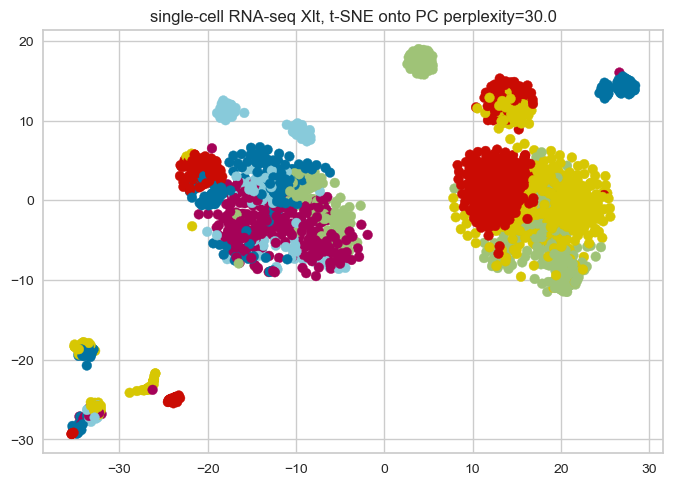

C:\Users\gangles\AppData\Local\Temp\ipykernel_14276\1896627316.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1],c=colors5Xlt[clustering5Xlt.labels_], cmap='viridis')


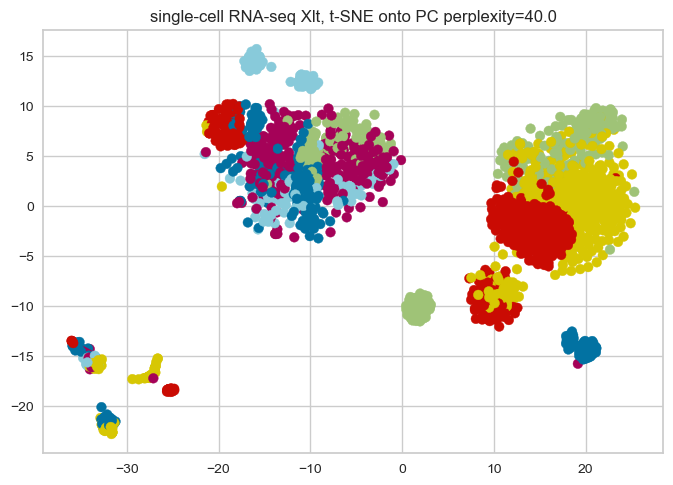

C:\Users\gangles\AppData\Local\Temp\ipykernel_14276\1896627316.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1],c=colors5Xlt[clustering5Xlt.labels_], cmap='viridis')


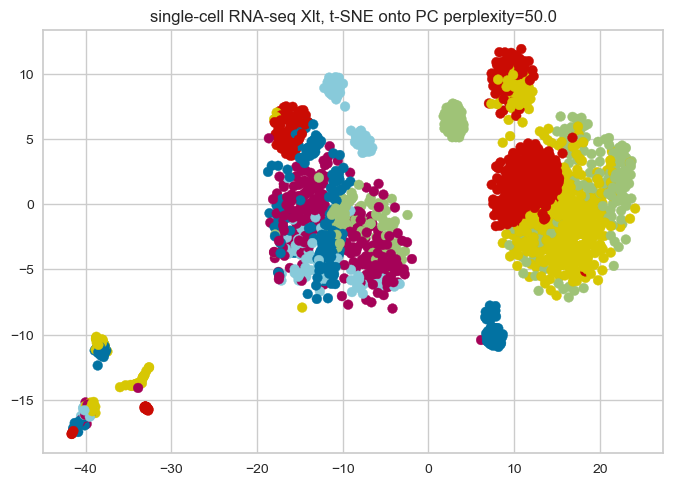

C:\Users\gangles\AppData\Local\Temp\ipykernel_14276\1896627316.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne[:,0], tsne[:,1],c=colors5Xlt[clustering5Xlt.labels_], cmap='viridis')


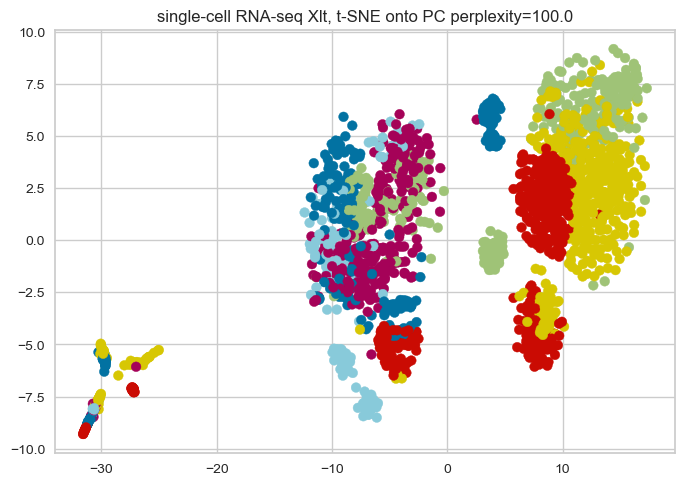

In [31]:
perplexities = [0.01,5.,20.,30.,40.,50.,100.]
for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity).fit_transform(Xlt)
    plt.scatter(tsne[:,0], tsne[:,1],c=colors5Xlt[clustering5Xlt.labels_], cmap='viridis')
    plt.title('single-cell RNA-seq Xlt, t-SNE onto PC perplexity={}'.format(perplexity))
    plt.show()

In [32]:
print("TODO")

TODO


In [33]:
# REGRESSION
# Clustering is already done. We will use clustering5Xt 
print("Summary of Data for regression")

labels5X = clustering5X.labels_
labels5Xt = clustering5Xt.labels_
labels5Xl = clustering5Xl.labels_
labels5Xlt = clustering5Xlt.labels_

centro5X = clustering5X.cluster_centers_
centro5Xt = clustering5Xt.cluster_centers_
centro5Xl = clustering5Xl.cluster_centers_
centro5Xlt = clustering5Xlt.cluster_centers_

features5X = clustering5X.n_features_in_
features5Xt = clustering5Xt.n_features_in_
features5Xl = clustering5Xl.n_features_in_
features5Xlt = clustering5Xlt.n_features_in_

print("labels")
print(labels5X)
print(labels5Xt)
print(labels5Xl)
print(labels5Xlt)

print("centro")
print(centro5X)
print(centro5Xt)
print(centro5Xl)
print(centro5Xlt)

print("features")
print(features5X)
print(features5Xt)
print(features5Xl)
print(features5Xlt)

Summary of Data for regression
labels
[ 3  3  3 ...  4 32 32]
[ 9 18 18 ... 19 19 19]
[20 17 17 ...  1  1 34]
[ 9  7  7 ... 10 10 29]
centro
[[  0.06313   0.      103.48127 ...   0.        0.        0.     ]
 [  0.        0.        0.      ...   0.        0.        0.     ]
 [  0.        0.      249.14498 ...   0.        0.        0.     ]
 ...
 [  0.        0.       22.12326 ...   0.        0.        0.     ]
 [  0.        0.      106.8463  ...   0.        0.        0.     ]
 [  0.01252   0.      140.6969  ...   0.        0.        0.     ]]
[[ -6075.31187  -8728.52812  -3528.45155 ...     -0.21165     -0.167
       0.     ]
 [137204.99477 -42474.30123  -7638.11445 ...      0.05852     -0.57209
       0.     ]
 [ -4448.71287   -951.87735  -4504.28443 ...      0.8905       0.75848
       0.     ]
 ...
 [ -2925.38193   -201.29394     22.84232 ...     -0.91287     -0.16174
       0.     ]
 [ -1102.6321   10350.4711   -2415.78216 ...     -0.16234      0.63556
       0.     ]
 [ -5688.0910

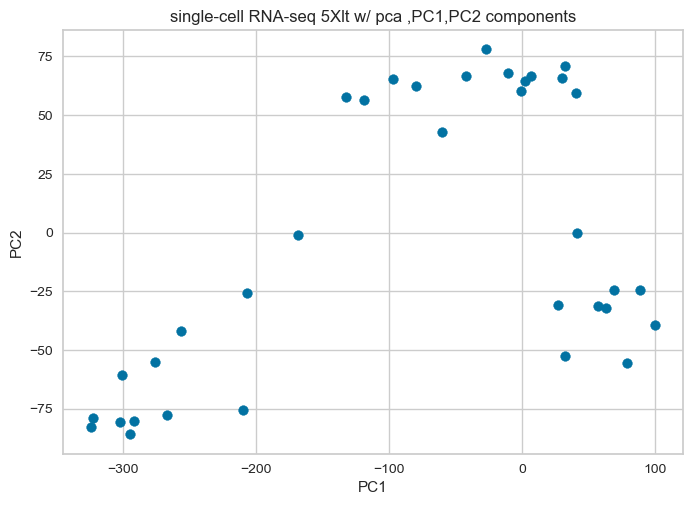

In [34]:
plt.scatter(centro5Xlt[:,0], centro5Xlt[:,1])
plt.title('single-cell RNA-seq 5Xlt w/ pca ,PC1,PC2 components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [35]:
#n_clusters = 5
#clustering = KMeans(n_clusters=5, n_init=50).fit(X_transformed)
#clustering_pca = KMeans(n_clusters=5, n_init=50).fit(X_transformed_pca)
#labels = clustering.labels_
#labels_pca = clustering_pca.labels_

In [36]:
# Separate into train/test data
start_time = time.perf_counter()
X_train_X, X_test_X, y_train_X, y_test_X = train_test_split(X, labels5X, test_size=0.33, shuffle=True)

modelX = LogisticRegressionCV(cv=5, Cs=[0.001, 0.01, 0.1, 1, 10], penalty='l2', multi_class='ovr', max_iter=5000)
#modelXl1 = LogisticRegressionCV(cv=5, Cs=[0.001, 0.01, 0.1, 1, 10], penalty='l1', solver='liblinear', max_iter=5000, multi_class='ovr')
#modelXelast = LogisticRegressionCV(cv=5, Cs=[0.001, 0.01, 0.1, 1, 10], penalty='elasticnet', solver='saga', l1_ratios=[0.25, 0.5, 0.75], multi_class='ovr', max_iter=5000)  ## Takes a loooong time

modelX.fit(X_train_X, y_train_X)
#modelXl1.fit(X_train_X, y_train_X)
#modelXelast.fit(X_train_X, y_train_X)
elapsed_time = time.perf_counter() - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")

C:\Users\gangles\.conda\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1917: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\gangles\.conda\envs\py310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Elapsed time: 2137.2433 seconds


In [37]:
# Separate into train/test data
X_train_Xl, X_test_Xl, y_train_Xl, y_test_Xl = train_test_split(Xl, labels5Xl, test_size=0.33, shuffle=True)

modelXl = LogisticRegressionCV(cv=5, Cs=[0.001, 0.01, 0.1, 1, 10], penalty='l2', multi_class='ovr', max_iter=5000)
#model = LogisticRegressionCV(cv=5, Cs=[0.001, 0.01, 0.1, 1, 10], penalty='l1', solver='liblinear', max_iter=5000, multi_class='ovr')
#model = LogisticRegressionCV(cv=5, Cs=[0.001, 0.01, 0.1, 1, 10], penalty='elasticnet', solver='saga', l1_ratios=[0.25, 0.5, 0.75], multi_class='ovr', max_iter=5000)  ## Takes a loooong time

modelXl.fit(X_train_Xl, y_train_Xl)

C:\Users\gangles\.conda\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1917: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\gangles\.conda\envs\py310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10], cv=5, max_iter=5000,
                     multi_class='ovr')

In [38]:
# Separate into train/test data
X_train_Xlt, X_test_Xlt, y_train_Xlt, y_test_Xlt = train_test_split(Xlt, labels5Xlt, test_size=0.33, shuffle=True)

modelXlt = LogisticRegressionCV(cv=5, Cs=[0.001, 0.01, 0.1, 1, 10], penalty='l2', multi_class='ovr', max_iter=5000)
# model = LogisticRegressionCV(cv=5, Cs=[0.001, 0.01, 0.1, 1, 10], penalty='l1', solver='liblinear', max_iter=5000, multi_class='ovr')
# model = LogisticRegressionCV(cv=5, Cs=[0.001, 0.01, 0.1, 1, 10], penalty='elasticnet', solver='saga', l1_ratios=[0.25, 0.5, 0.75], multi_class='ovr', max_iter=5000)  ## Takes a loooong time

modelXlt.fit(X_train_Xlt, y_train_Xlt)

C:\Users\gangles\.conda\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1917: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\gangles\.conda\envs\py310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10], cv=5, max_iter=5000,
                     multi_class='ovr')

In [39]:
score1X= modelX.score(X_test_X, y_test_X)
print(score1X)
score1Xl = modelXl.score(X_test_Xl, y_test_Xl)
print(score1Xl)
score1Xlt = modelXlt.score(X_test_Xlt, y_test_Xlt)
print(score1Xlt)

0.8170391061452514
0.8575418994413407
0.8868715083798883


In [40]:
n_coef = 100
#print(modelX.coef_)
sum_coef_X = np.sum(np.abs(modelX.coef_), axis=0)
#print(sum_coef_X)
top_coef_X = sum_coef_X.argsort()[::-1][:n_coef]
print("top_coef")
print(top_coef_X)

random_features_X = np.random.choice(X.shape[1], n_coef, replace=False)
max_variance_features_X = np.var(X, axis=0).argsort()[::-1][:n_coef]
print(max_variance_features_X)

n_coef = 100
#print(modelXl.coef_)
sum_coef_Xl = np.sum(np.abs(modelXl.coef_), axis=0)
#print(sum_coef_Xl)
top_coef_Xl = sum_coef_Xl.argsort()[::-1][:n_coef]
print("top_coef")
print(top_coef_Xl)

n_coef = 100
#print(modelXlt.coef_)
sum_coef_Xlt = np.sum(np.abs(modelXlt.coef_), axis=0)
#print(sum_coef_Xlt)
top_coef_Xlt = sum_coef_Xlt.argsort()[::-1][:n_coef]
print("top_coef")
print(top_coef_Xlt)

random_features_Xl = np.random.choice(Xl.shape[1], n_coef, replace=False)
max_variance_features_Xl = np.var(Xl, axis=0).argsort()[::-1][:n_coef]
print(max_variance_features_Xl)
random_features_Xlt = np.random.choice(Xlt.shape[1], n_coef, replace=False)
max_variance_features_Xlt = np.var(Xlt, axis=0).argsort()[::-1][:n_coef]
print(max_variance_features_Xlt)

top_coef
[32023 32315 42788 43520  3502 35138 40166 34463  4356  4688  4300  8586
  3542  4368  4369 36985 39674  3484  3486 45732 41846 24380 23382 37125
  3095 34372 40981 38286 40972 34453 38999  3528 40962  4303 34309 32259
  5730 40094 44094 23490 25325  5341 24393 37403 41265  2791  5223  5250
  3138 41852  8567 39126  7397 38467 38860 42940  8283 32057 43620 39125
 38015 34406 32005 37844 34844 43513  4100 24483 38484 34475 45081 41848
  4899 39863 38413 34911 40096 32312 34904 45084 41447 40545 24392 37104
  6034  5551  3546  3493 31506 34462  7463  3539  5809  3550 24301 24303
 39861 45082 38793 40084]
[38255 32023 44094  4100  3113 37532  4369  3114 40962 34844 37125  8472
 25324 41531 38286  4368 44784 40166 42788 39126 40981 38999  4688  8586
 36985 32315  4303 45732 31892 34372 39674 32259  4356 41899  5250  3486
  4439 31893 35138 34453  5551 39861  2791 41846 37542 43283  5849 43520
 34309  5809  5390 32202 23490 40797 31896  4300 25325  3502 41264  3483
 38396 41898 378

In [41]:
start_time = time.perf_counter()
set_features = [top_coef_X, random_features_X, max_variance_features_X]

scores = []
for features in set_features:
    x = X[:, np.array(features)]
    X_train, X_test, y_train, y_test = train_test_split(x, labels5X, test_size=0.33, shuffle=True)

    modelX = LogisticRegressionCV(cv=5, Cs=[0.001, 0.01, 0.1, 1, 10], penalty='l2', multi_class='ovr', max_iter=5000)
    modelX.fit(X_train, y_train)

    model_score = modelX.score(X_test, y_test)
    scores.append(model_score)

print(np.round(np.asarray(scores), 5))
elapsed_time = time.perf_counter() - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")

C:\Users\gangles\.conda\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1917: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\gangles\.conda\envs\py310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\gangles\.conda\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.74441 0.35056 0.75   ]
Elapsed time: 519.5844 seconds


In [42]:
set_features = [top_coef_Xl, random_features_Xl, max_variance_features_Xl]

scores = []
for features in set_features:
    x = Xl[:, np.array(features)]
    X_train, X_test, y_train, y_test = train_test_split(x, labels5Xl, test_size=0.33, shuffle=True)

    modelXl = LogisticRegressionCV(cv=5, Cs=[0.001, 0.01, 0.1, 1, 10], penalty='l2', multi_class='ovr', max_iter=5000)
    modelXl.fit(X_train, y_train)

    model_score = modelXl.score(X_test, y_test)
    scores.append(model_score)

print(np.round(np.asarray(scores), 5))

C:\Users\gangles\.conda\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1917: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\gangles\.conda\envs\py310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\gangles\.conda\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1917: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\gangles\.conda\envs\py310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_s

[0.7919  0.4148  0.75559]


In [43]:
set_features = [top_coef_Xlt, random_features_Xlt, max_variance_features_Xlt]

scores = []
for features in set_features:
    x = Xlt[:, np.array(features)]
    X_train, X_test, y_train, y_test = train_test_split(x, labels5Xlt, test_size=0.33, shuffle=True)

    modelXlt = LogisticRegressionCV(cv=5, Cs=[0.001, 0.01, 0.1, 1, 10], penalty='l2', multi_class='ovr', max_iter=5000)
    modelXlt.fit(X_train, y_train)

    model_score = modelXlt.score(X_test, y_test)
    scores.append(model_score)

print(np.round(np.asarray(scores), 5))

C:\Users\gangles\.conda\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1917: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\gangles\.conda\envs\py310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\gangles\.conda\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1917: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\gangles\.conda\envs\py310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_s

[0.90223 0.12849 0.87709]


In [44]:
# Evaluate features by training a logistic regression model on the training, evaluate on test.
X_train_e = np.load("C:/data/p2_evaluation/X_train.npy")
y_train_e = np.load("C:/data/p2_evaluation/y_train.npy")
X_test_e = np.load("C:/data/p2_evaluation/X_test.npy")
y_test_e = np.load("C:/data/p2_evaluation/y_test.npy")
print(X_train_e.shape)
print(X_test_e.shape)
print(y_train_e)
print(y_test_e)

(1077, 45768)
(1108, 45768)
[ 0  0  0 ... 35 35 35]
[ 0  0  0 ... 35 35 35]


In [45]:
# Separate into train/test data
# X_train_X, X_test_X, y_train_X, y_test_X = train_test_split(X, labels5X, test_size=0.33, shuffle=True)

modelXvX = LogisticRegressionCV(cv=5, Cs=[0.001, 0.01, 0.1, 1, 10], penalty='l2', multi_class='ovr', max_iter=5000).fit(X_train_X, y_train_X)
#modelXvXl = LogisticRegressionCV(cv=5, Cs=[0.001, 0.01, 0.1, 1, 10], penalty='l2', multi_class='ovr', max_iter=5000).fit(X_train_Xl, y_train_Xl)
#modelXvXlt= LogisticRegressionCV(cv=5, Cs=[0.001, 0.01, 0.1, 1, 10], penalty='l2', multi_class='ovr', max_iter=5000).fit(X_train_Xlt, y_train_Xlt)

# model = LogisticRegressionCV(cv=5, Cs=[0.001, 0.01, 0.1, 1, 10], penalty='l1', solver='liblinear', max_iter=5000, multi_class='ovr')



C:\Users\gangles\.conda\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1917: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\gangles\.conda\envs\py310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [46]:
print(X_train_X.shape)
print(X_train_e.shape)
print(X_test_e.shape)

print(np.max(y_train_e))
print(np.max(y_train_X))

scorenXvX = modelXvX.score(X_train_e, y_train_e)
#scorenXvXl = modelXvXl.score(X_train_e, y_train_e)
#scorenXvXlt = modelXvXlt.score(X_train_e, y_train_e)
scoretXvX = modelXvX.score(X_test_e, y_test_e)
#scoretXvXl = modelXvXl.score(X_test_e, y_test_e)
#scoretXvXlt = modelXvXlt.score(X_test_e, y_test_e)

print(scorenXvX)
#print(scorenXvXl)
#print(scorenXvXlt)
print(scoretXvX)
#print(scoretXvXl)
#print(scoretXvXlt)

(1453, 45768)
(1077, 45768)
(1108, 45768)
35
34
0.08356545961002786
0.05054151624548736


In [47]:
set_features = [top_coef_Xlt, random_features_Xlt, max_variance_features_Xlt]

scores_test_e = []
scores_train_e = []
for features in set_features:
    x = X[:, np.array(features)]
    #X_train_e = X_train_e[:, np.array(features)]
    #X_test_e = X_test_e[:, np.array(features)]
    
    X_train, X_test, y_train, y_test = train_test_split(x, labels5Xlt, test_size=0.33, shuffle=True)

    modelX = LogisticRegressionCV(cv=5, Cs=[0.001, 0.01, 0.1, 1, 10], penalty='l2', multi_class='ovr', max_iter=5000)
    modelX.fit(X_train, y_train)

    model_score = modelX.score(X_test_e, y_test_e)
    scores_test_e.append(model_score)
    model_score = modelX.score(X_train_e, y_train_e)
    scores_train_e.append(model_score)

print(np.round(np.asarray(scores_test_e), 5))
print(np.round(np.asarray(scores_train_e), 5))

C:\Users\gangles\.conda\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1917: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\gangles\.conda\envs\py310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\gangles\.conda\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


ValueError: X has 45768 features, but LogisticRegressionCV is expecting 100 features as input.